# **<font color ="red"> Homework 2: Neural Named Entity Recognition (NER)</font>**
## **<font color ="green">CS4740/5740 Fall 2022</font>**

## Grouping deadline: Wednesday Oct 5, 11:59pm on CMS (site will open soon)

## Project Submission Due: Thursday Oct 20, 11:59pm (probably CMS, details TBA)

**We highly recommend you complete parts 1-3 by Tue Oct 4, as preparation for the midterm on Oct 6.**  But you don't have to turn anything in; we understand it's prelim season.

**Name 1:** Fengyue Zhao

**NetID 1:** fz227

**Name 2:** Jiaqi Liang

**NetID 2:** jl4274

**NOTE:** Please include your name(s) and NetID(s) in this notebook. Notebooks missing this information will be deducted points (though note that you will *not* receive points for including this information). 

**Editing your version of this notebook:** One partner should make a copy of this notebook and share it with your partner.  **However**, because of synchronization issues (even though Colab works with Google Drive), changes made in this notebook at the same time from different computers/browser windows may not save. We will go so far as to recommend that you close the tab with this notebook when you are not working on it so your partner doesn't face sync issues.

**Collaboration policy:** please be sure to check the collaboration policy on the [course website](https://courses.cs.cornell.edu/cs4740/2022fa/)!

**Coding cells:** Any cells that require you to code will have the `### TODO : [description] ###` comment, where the `[description]` varies per cell.

**Cell Outputs:** For grading (aka to help us give you partial credit), please ensure the final cell outputs are present for all cells in the notebook you submit.

**Teams/groups:** Everyone resets to a "singleton" when each new assignment is released.  If you want to have a partner for HW2, regardless of whether it's a previous homework partner or a new one, you must do the CMS invite/accept process anew.

Code of Academic Integrity:  **Do not copy code from online or share code with students other than your designated partner**. We will be running programs to detect plagiarism.

> Assignment authors & testers: CS 4740/5740 professors and TAs from this and previous semesters, John Chung, Renee Shen, John R. Starr, as well as Tushaar Gangavarapu, Fangcong Yin, and Shaden Shaar.

# **Introduction** 🔎 
---

This project serves as a neural complement of HW1. In HW1, you  implemented HMM and MEMM models that performed Named Entity Recognition (NER). In this project, your task is to develop neural models that identify named entities and assign them the appropriate label: **B-ORG, I-ORG, B-PER, I-PER, B-LOC, I-LOC, B-MISC, I-MISC** or **O**.

A goal of this assignment is to compare your neural models with your previous HMM and MEMM model. As such, we're using the same dataset as in HW1. 


For this project, you will implement three neural models:
- Model 1 : a feed-forward neural network (FFNN)
- Model 2 : a recurrent neural network (RNN)
- Model 3 : a second recurrent neural network (RNN2) with variable number of hidden layers.


For all three models, you will implement and train these three sequence-tagging models. However, you will only generate your predictions for the provided test set with the FFNN and the first RNN models; these predictions will be submitted to **Kaggle**. Note that you will not submit predictions on the full test set for the second RNN (RNN2). Please enter all code and answer all the questions in this colab notebook.

Additionally, both your FFNN and RNN models will be uploaded to **CMS**. *We are currently in the process of setting this up; an announcement will be made when this is available to you.*


For your reference, we recommend the following sections from the **Jurafsky & Martin** textbook (which can be found at [this link](https://web.stanford.edu/~jurafsky/slp3/)):
- For information on FFNNs: **7.3-7.8**
- For information on RNNs: **9.2-9.7**

Additionally, we encourage you to review the lecture slides, which can be found on the course website.

## **Advice**

---
1. We strongly encourage you to enable GPU support (Google Colab provides GPUs if you don't have them locally). To do so, go to `Runtime` --> `Change Runtime Type` --> Dropdown box below `Hardware Accelerator`. This will help your models train *much* faster!
2. Please read through the entire notebook before you start coding. That might inform your code structure.
3. An assignment outline and grading breakdown (subject to minor adjustments) is found below; please consult it.

<a name="outline"></a>
## **Assignment outline and grading breakdown**
- [Part 1](#part1)
  - [Q1](#q1) [5 pts]
  - [Q2](#q2) [3 pts]
  - [Writing Padding Function](#padding_func) [5 pts]
  - [Padding Data](#padding_data) [7 pts]
  - [Q3](#q3) [3 pts]
  - [Q4](#q4) [5 pts]
- [Part 2](#part2)
  - [Initializing FFNN](#init_ffnn) [12 pts]
  - [Finding Four Errors](#four_errors) [12 pts]
  - [Q5](#q5) [8 pts]
- [Part 3](#part3)
  - [Training and Evaluating Your FFNN](#te_ffnn)[10 pts]
  - [Saving FFNN Model](#save_ffnn)[3 pts]
  - [Q6](#q6) [5 pts]
- [Part 4](#part4)
  - [Initializing RNN](#init_rnn) [15 pts]
  - [Writing Forward Function](#init_rnn) [20 pts]
  - [Training and Evaluating Your RNN](#te_rnn)[5 pts]
  - [Saving RNN Model](#save_rnn) [3 pts]
  - [Q7](#q7) [5 pts]
- [Part 5](#part5)
  - [Initializing RNN2](#init_rnn2) [10 pts]
  - [Writing Forward Function 2](#init_rnn2) [15 pts]
  - [Training and Evaluating Your RNN2](#te_rnn2) [5 pts]
  - [Q8](#q8) [5 pts]
  - [Visualizing Your Activations](#activ) [15 pts]
  - [Q9](#q9) [10 pts]

- [Part 6](#part6)
  - [Q10](#q10) [10 pts]
  - [Q11](#q11) [7 pts]
  - [Q12](#q12) [7 pts]
  - [Q13](#q13) [7 pts]
  - [Q14](#q14) [7 pts]
- [Part 7](#part7)

Outperforming our FFNN baseline on Kaggle [5 pts]

Outperforming our RNN baseline on Kaggle [10 pts]

**A brief note on the Kaggle baselines:** To give you some breathing room for your implementation, our baselines are *not* perfect implementations. Correct implementations should therefore outperform our baselines.

<a name="part1"></a>
[[^^^]](#outline) 
# **Part 1: Preparing Our Data**

In this part, you will convert the data into a format that can be passed through the basic feed-forward neural network (FFNN) found in Parts 2 & 3. Specifically, you will complete the following steps:

- Load in the data from [HW1](https://drive.google.com/drive/folders/1B1ge2waJY4wu9DrYo-q4T3lMNa6dz0vM?usp=sharing)
- Convert the input tokens *and* labels into a numerical representation
- Pad the sentences 

Let's begin!

In [ ]:
# Installing gensim (if needed)
!pip install -U gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.1 MB 1.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
# Tons and tons of imports!
from collections import Counter, namedtuple
from itertools import chain
import json
import math
import os
from pathlib import Path
from tqdm.notebook import tqdm, trange
from typing import List, Tuple, Dict, Set, Union
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.nn import init
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
import torch.nn.utils
import torch.nn.functional as F
from torch.nn.utils.rnn import pad_packed_sequence, pack_padded_sequence

##1.1: Data Preparation
First, we need to load in the data from our Google Drive. Please adjust the following code to fit your drive's organization.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### TODO : please modify the line below with your drive organization ###
path = os.path.join(os.getcwd(), "/content/drive/MyDrive/CS 5740/HW1_DATA/CS_4740_fa22_hw1")

with open(os.path.join(path,'train.json'), 'r') as f:
     train = json.loads(f.read())

with open(os.path.join(path,'val.json'), 'r') as f:
     val = json.loads(f.read())

with open(os.path.join(path,'test.json'), 'r') as f:
     test = json.loads(f.read())

## 1.2: Creating Vector Representations of the Data
Currently, the dataset has three fields: 
1. a 'text' field that is a list of a list of strings
2. an 'index' field that is a list of a list of integers
3. an 'NER' field that is a list of a list of strings

However, if we fed the model the data in its present form, it would be a disaster! Therefore, we must modify our data to a format that our models can comprehend. The following few subsections will ask you to complete smaller tasks to aid in your understanding of this process.

For your understanding, we have provided a visualization that shows the distribution of sentence lengths:

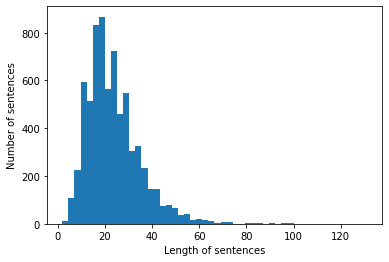

In [ ]:
plt.hist([len(sentence) for sentence in train['text']], bins=50)
plt.xlabel('Length of sentences')
plt.ylabel('Number of sentences')
plt.show()


<a name="q1"></a>
[[^^^]](#outline) 

### **Q1: On Embeddings for FFNN**
Describe why we cannot use string (categorical, string) data as inputs for our neural models and must instead use word embeddings.



#### **A1:** 

The neural models requires the numerical inputs and need to train the weight matrix with multiple layers. Also, calculating the loss function, gradiencts is also a numerie process. If we use string as inputs, it will generate extremely large data matrix to store and will make the whole system very slow and inefficient. Transfroming data into embeddings will help to reduce the dimensions.

The following `Vocab` class aids in processing your dataset. It has a number of essential functions, including:

- `__getitem__`
- `word_from_id`
- `add`

Please familiarize yourself with these functions.

In [ ]:
UNK = "<UNK>"
PAD = "<PAD>"

class Vocab(object):
    """ Vocabulary, i.e. structure containing language terms.

      Instance attributes:
        word2id: dictionary mapping words to indices
        unk_id: index for UNK
        id2word: dictionary mapping indices to words

    """
    def __init__(self, word2id=None):
        """ Init Vocab Instance.
        
        :param word2id: dictionary mapping words 2 indices
        :type word2id: dict[str, int]
        """
        if word2id:
            self.word2id = word2id
        else:
            self.word2id = dict()
            self.word2id[PAD] = 0   # Pad Token
            self.word2id[UNK] = 1   # Unknown Token
        self.unk_id = self.word2id[UNK]
        self.id2word = {v: k for k, v in self.word2id.items()}

    def __getitem__(self, word):
        """ Retrieve word's index. Return the index for the unk
        token if the word is out of vocabulary.
        
        :param word: word to look up
        :type word: str
        :returns: index of word
        :rtype: int
        """
        return self.word2id.get(word, self.unk_id)

    def __contains__(self, word):
        """ Check if word is captured by Vocab.
        
        :param word: word to look up
        :type word: str
        :returns: whether word is in vocab
        :rtype: bool
        """
        return word in self.word2id

    def __setitem__(self, key, value):
        """ Raise error, if one tries to edit the Vocab directly.
        """
        raise ValueError('vocabulary is readonly')

    def __len__(self):
        """ Compute number of words in Voca.
        
        :returns: number of words in Vocab
        :rtype: int
        """
        return len(self.word2id)

    def __repr__(self):
        """ Representation of Vocab to be used
        when printing the object.
        """
        return 'Vocabulary[size=%d]' % len(self)

    def word_from_id(self, wid):
        """ Return mapping of index to word.
        
        :param wid: word index
        :type wid: int
        :returns: word corresponding to index
        :rtype: str
        """
        return self.id2word[wid]

    def add(self, word):
        """ Add word to Vocab, if it is previously unseen.
        
        :param word: to add to Vocab
        :type word: str
        :returns: index that the word has been assigned
        :rtype: int
        """
        if word not in self:
            wid = self.word2id[word] = len(self)
            self.id2word[wid] = word
            return wid
        else:
            return self[word]

    ############################################################################
    #######################            CHANGED            ######################
    ############################################################################
    @staticmethod
    def from_corpus(corpus, remove_frac=None, freq_cutoff=None): 
        """ Given a corpus construct a Vocab.
        
        :param corpus: corpus of text produced by read_corpus function
        :type corpus: List[str]
        :param freq_cutoff: if word occurs n < freq_cutoff times, drop the word
        :type freq_cutoff: int
        :returns: Vocab instance produced from provided corpus
        :rtype: Vocab
        """
        vocab_entry = Vocab()
        word_freq = Counter(chain(*corpus))
        if freq_cutoff is None:
            freq_cutoff = 1
        valid_words = [w for w, v in word_freq.items() if v >= freq_cutoff]
        print('number of word types: {}, number of word types w/ frequency >= {}: {}'
              .format(len(word_freq), freq_cutoff, len(valid_words)))
        top_words = sorted(valid_words, key=lambda word: word_freq[word], reverse=True)
        if remove_frac is not None:
            size = len(top_words) - int(remove_frac * len(top_words))
            top_words = top_words[:size]
            print(f'number of unique words retained with remove_frac={remove_frac}: {len(top_words)}')
        for word in top_words:
            vocab_entry.add(word)
        return vocab_entry

In [ ]:
################################################################################
#########################             ADDED             ########################
################################################################################
def tokenize_sentences(sentences, vocab):
    output = []
    for sentence in sentences:
        tokenized_sentence = [vocab[w] for w in sentence]
        output.append(tokenized_sentence)
    return output

<a name="padding_func"></a>
[[^^^]](#outline) 
### **1.2.1 Padding Sentences**
Next, we need to write a function that will pad our sentences and labels according to the longest sentence in the training data. For example, say the longest sentence in our training data was "The quick brown fox jumped over the lazy dog" (*len* = 9). Then, if given the sentence "The quick brown fox jumped", we would pad the sentence to: "The quick brown fox jumped `<PAD>` `<PAD>` `<PAD>` `<PAD>`".

<a name="q2"></a>
[[^^^]](#outline) 

### **Q2: On Padding Embeddings**

Why must we pad our embeddings to the length of the longest sentence in the dataset? What issues might we encounter if we do not?

#### **A2:** 
Embedding is to ensure that the input sequences are of uniform size. If we do not pad our embeddings to the length of the longest sentence in the dataset, we will encounter dimension issues since we are going to do lots of matrix calculations. If matrices do not have the same dimenstion, we cannot do those calculations such as matrix addition and multiplication.


In the following code block, determine the longest sentence in the dataset and write a function that adds the `pad_token` the appropriate number of times.

In [ ]:
### TODO : Determine the longest sentence in the data and assign it to the variable max_len ###

max_len = 0
for sentence in train['text']:
  cur_len = len(sentence)
  if cur_len > max_len:
    max_len = cur_len



def pad_sents(sents, pad_token, max_len):
    """ Pad list of sentences according to the longest sentence in the batch.
        The paddings should be at the end of each sentence.
    
    Arguments:
      sents(list[list[str]]): list of sentences, where each sentence
                                    is represented as a list of words
      pad_token(str): padding token

      max_len(int): length of the longest sentence in the dataset

    Returns:
      sents_padded(list[list[str]]): list of sentences where sentences shorter
        than the max length sentence are padded out with the pad_token, such that
        each sentence in the batch now has equal length.
    """
    ### TO DO: Write a function that will pad the sentences according to 
    ## the longest sentence in the dataset ###
    pad_sent = sents.copy()
    for sent in pad_sent:
      if len(sent) < max_len:
        num_pad = max_len - len(sent)
        list_pad = []
        for i in range(num_pad):
          list_pad.append(pad_token)
        sent.extend(list_pad)

    return pad_sent


After padding the data you need to create a mask that indicated which tokens are original tokens and which are padding. This is used so that when you backpropagate, you do not backpropagate on the padded tokens:

In [ ]:
################################################################################
#########################             ADDED             ########################
################################################################################
def get_masks(sents_padded, pad_token):
    """ Create masks for a list of sentences according to the longest sentence 
        in the training data.
        The mask should be a binary array.
    
    Arguments:
      sents_padded(list[list[str]]): list of sentences where sentences shorter
        than the max length sentence are padded out with the pad_token, such that
        each sentence in the batch now has equal length.

      pad_token(str): padding token

    Returns:
      sents_masks(list[list[Int]]): list of 0/1 where words shorter
        than the max length in the sentence are denoted as 1 and 0 otherwise.
    """
    all_masks = []
    for sent in sents_padded:
      all_masks.append([0 if w == pad_token else 1 for w in sent])
    return all_masks

### **1.2.2 Converting Labels to Numerical Values**
In addition to converting our tokens to vector representations, we need to convert our predicted labels to numerical representations as well. For example, say we have two labels: "O", "B-ORG". We could numerically represent these labels in a dictionary: `{"O":0, "B-ORG":1}`


<a name="q3"></a>
[[^^^]](#outline) 
### **Q3: On Making Predicted Labels Numerical**


#### **A3:** 
The neural network need the backpropagation process to train the whole system. In the backpropagation process, we need to calculate the loss between the desired output and the true output. If the predicted labels are strings, the loss cannot be calculated. The loss can only be calculated when the desired results are numbers.

In the following code, write a function that takes in the NER labels for each item in the dataset and converts it to the appropriate numerical label as defined in `category_map`:

In [ ]:
category_map = {"O": 0,
                "B-ORG": 1,
                "I-ORG": 2,
                "B-PER": 3,
                "I-PER": 4,
                "B-LOC": 5,
                "I-LOC": 6,
                "B-MISC": 7,
                "I-MISC": 8}

def encode_ner_category(category_data: List[List[str]])->List[List[int]]:
  """ Encoding NER category from a list of strings to a list of integers

  Arguments: 
    category_data (list(list(str))): NER categories

  Returns:
    encoded category (list(list(int))): Numerical conversions of NER categories
  """

  ### TODO : write a function that converts NER labels to integers ###

  converted_data = []
  for NERs in category_data:
    converted_list = []
    for NER in NERs:
      numerical_NER = category_map[NER]
      converted_list.append(numerical_NER)
    converted_data.append(converted_list)

    #converted_list = map(lambda x: x = category_map[x],  NERs)
    # converted_data.append(converted_list)
      

  return converted_data



<a name="padding_data"></a>
[[^^^]](#outline) 
### **1.2.3: Data Processing, Padding Data**

In this section, we will construct new `processed_train` and `processed_val` datasets which will pad both input 'text' and expected output 'NER'. The 'text' portion of the data should be padded with the `<PAD>` token, and the 'NER' portion of the data should be padded with 0. 

**NOTE: PLEASE DO NOT MODIFY ANY INSTANCES OF `torch.manual_seed(123)`, as this will affect the output of your model and therefore cause issues with the autograder!**

In [ ]:

# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)

################################################################################
#########################            CHANGED            ########################
################################################################################
print('initialize train vocabulary ..')
vocab = Vocab.from_corpus(train['text'], remove_frac=0.5)

initialize train vocabulary ..
number of word types: 24823, number of word types w/ frequency >= 1: 24823
number of unique words retained with remove_frac=0.5: 12412


In the following code block, fill in the processed_train and process_val dictionaries with padded and encoded representations for the NER labels and the padded text labels. 

In [ ]:
### TODO : Create two dictionaries (processed_train & processed_val) that have 'NER' and 'text' as keys and padded sentences as items. 
### TODO : Pad the training and testing text and NER labels, and add them to the new dictionaries.

################################################################################
#########################            CHANGED            ########################
################################################################################
# processed_train = dict()
# processed_train['NER'] = '' # TO DO: labels (list(list(int)))
# processed_train['text'] = '' # TO DO: padded sentences

train_text_pad = pad_sents(train['text'], PAD, max_len)
train_ner = encode_ner_category(train["NER"])
train_ner_pad = pad_sents(train_ner, 0, max_len)

processed_train = {"NER": train_ner_pad , "text":train_text_pad}
processed_train['text-tokenized'] = tokenize_sentences(processed_train['text'], 
                                                       vocab)
processed_train['mask'] = get_masks(processed_train['text'], PAD)


val_text_pad = pad_sents(val['text'], PAD, max_len)
val_ner = encode_ner_category(val["NER"])
val_ner_pad = pad_sents(val_ner, 0, max_len)

processed_val = {"NER": val_ner_pad , "text":val_text_pad}
processed_val['text-tokenized'] = tokenize_sentences(processed_val['text'], 
                                                     vocab)
processed_val['mask'] = get_masks(processed_val['text'], PAD)


test_text_pad = pad_sents(test['text'], PAD, max_len)
test_ner = []
test_ner_pad = pad_sents(test_ner, 0, max_len)

processed_test = {"NER": test_ner_pad , "text":test_text_pad}
processed_test['text-tokenized'] = tokenize_sentences(processed_test['text'], 
                                                      vocab)
processed_test['mask'] = get_masks(processed_test['text'], PAD)

At this point, we have processed our data. Let's get into it! 

### **1.2.5: Dataloaders**

Using the `LanguageDataset` class and `get_data_loaders` function, we will finally combine all of our processed data in preparation for the FFNN.

In [ ]:
################################################################################
#########################            CHANGED            ########################
################################################################################
class LanguageDataset(Dataset):
    """LanguageDataset is a torch dataset to interact with the Language data.

        Dataset (List[Tuple[List[torch.Tensor], int]]):  The vectorized dataset with input and expected output values.
        Dataset is an abstract class representing a dataset: https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset
        
    """
    def __init__(self, text, tag, mask):
        """
        Loads in the text and tags as tensors.

        Args:
            :param text: padded sentence (including padding)
            :type text: list(list(int))
            :param tag: encoded labels (including padding)
            :type tag: list(list(int): 
            :param mask: mask for the padded sentences (including padding)
            :type tag: list(list(int): 
        """
        self.text = torch.tensor(text)
        self.tag = torch.tensor(tag)
        self.mask = torch.tensor(mask, dtype=torch.bool)
        self.len = len(text)
    
    def __len__(self):
        """__len__ returns the number of samples in the dataset.

        :returns: number of samples in dataset
        :rtype: int
        """
        return self.len

    def __getitem__(self, index):
        """__getitem__ returns the tensor, output pair for a given index

        :param index: index within dataset to return
        :type index: int
        :returns: A tuple (x, y, m) where x is model input, y is our label and m is the mask
        :rtype: Tuple[torch.Tensor, torch.Tensor, torch.Tensor]
        """

        if not self.tag.numel():
             return self.text[index], [], self.mask[index]
        else:
            return self.text[index], self.tag[index], self.mask[index]


In the following function, we will take in our `processed_train`, `processed_val`, `vectorized_train`, and `vectorized_val` data, align the NER labels with the appropriate vectorized text, and shuffle them around using the `Subset` function.

In [ ]:
################################################################################
#########################            CHANGED            ########################
################################################################################
def get_data_loaders(preprocessed_data, batch_size=1, shuffle=False):
    """Pads, vectorizes, and batchifies the dataset.

    Args:
        preprocessed_data (dict(str:list(list(str), str:list(list(int))))): The processed data with 'text', 'NER', 'mask' and 'text-tokenized' labels
    """
    dataset = LanguageDataset(preprocessed_data['text-tokenized'], 
                              preprocessed_data['NER'], preprocessed_data['mask'])
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)
    return loader
    

In [ ]:
################################################################################
#########################            CHANGED            ########################
################################################################################

# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)

batch_size = 64
train_loader = get_data_loaders(processed_train, batch_size=batch_size, shuffle=True)
val_loader = get_data_loaders(processed_val, batch_size=batch_size)
test_loader = get_data_loaders(processed_test, batch_size=batch_size)


<a name="part2"></a>
[[^^^]](#outline) 
# **Part 2: Implementing Feed Forward Neural Network (FFNN)**
Feed forward neural networks (FFNNs) are often the starting point for learning how to implement a neural model -- we will follow this tradition. Prior to completing this section, we strongly encourage you to revisit the PyTorch tutorial and other lectures slides to aid in your conceptual understanding of the topic.

In this part, we will:

- write the `__init__` method for a FFNN
- debug the `forward` function
- debug the `train_epoch` function

<a name="init_ffnn"></a>
[[^^^]](#outline) 
## **2.1 Initializing attributes for FFNN module: fix errors we planted, and finish the implementation**
In our FFNN, we will pass the data through two linear layers. We also need to establish our [activation](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity), [softmax](https://pytorch.org/docs/stable/nn.html#non-linear-activations-other), and [loss functions](https://pytorch.org/docs/stable/nn.html#loss-functions). Please click the links above to see many of the possible variations on these functions that are built-in to PyTorch.

In the `__init__` method for the FFNN below, you need to implement an architecture with the following properties:
1. An embedding layer and a linear layer (and no more layers), where the output of the first layer has the same dimensionality as the input of the second layer.
2. ~~ReLU activation function~~ [Removed on Oct 19 10:30am.  
Rationale: see Oct 19 update in [section 2.2](https://colab.research.google.com/drive/1dB4X5V_6L1Ck7tx8fOndadgu7gdLoRSv#four_errors).
History: back when we were using pretrained word embeddings, adding an activation on the embedding layer to adapt the pretrained embeddings to our task made sense. When we switched to doing our own training of the embeddings, we forgot to remove the ReLU requirement.] 
3. log softmax function (that will be applied to our output layer)
4. negative-log-likelihood loss function.

**But**, to get you to actively engage in understand the code skeleton below, **we have introduced (planted) four errors in the lines after your `__init__`** (more on this in the following section).

In [ ]:
# Lambda to switch to GPU if available
get_device = lambda : "cuda:0" if torch.cuda.is_available() else "cpu"

# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)

################################################################################
#########################             ADDED             ########################
################################################################################
def weight_init(m):
  if isinstance(m, nn.Linear):
    nn.init.xavier_uniform_(m.weight)
    nn.init.constant_(m.bias, 0.)

# Consult the PyTorch documentation for information on the functions used below:
# https://pytorch.org/docs/stable/torch.html


In [ ]:

class FFNN(nn.Module):
  def __init__(self, embedding_dim, hidden_dim, output_dim, vocab_size):
    super(FFNN, self).__init__()
		############################################################################
		#########################             ADDED             ####################
		############################################################################
    self.loss_class_weights = torch.tensor([0.5, 1, 1, 1, 1, 1, 1, 1, 1], 
		                                       dtype=torch.float).to(get_device())
    self.embedding = nn.Embedding(vocab_size, embedding_dim, max_norm=True).to(get_device())
	  
    ### TODO : initialize your model with the necessary layers and functions ###
    self.W = nn.Linear(embedding_dim, hidden_dim).to(get_device())
    #self.output = nn.Linear(hidden_dim, output_dim).to(get_device())
  
    #Functions
    #self.relu = nn.ReLU()
    self.softmax = nn.LogSoftmax(dim=1)
    self.loss = nn.NLLLoss()

		### Here are pytorch docs which you may find useful:
		### Linear layer:
		###		https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
		### ReLU: 
		###		https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html
		### LogSoftmax:
		###		https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html
		### NLLoss:
		###		https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html

	##############################################################################
	#########################           CHANGED             ######################
	##############################################################################
  def compute_Loss(self, predicted_vector, gold_label, masks):
    return self.loss(predicted_vector[masks], gold_label[masks])

  def forward(self, input_vector):
    ############################################################################
    #########################             ADDED             ####################
    ############################################################################
      # input_vector=(batch_size, max_len) = (64, 131)
    #print(input_vector.shape)
    original_shape = input_vector.shape
    input_vector = input_vector.reshape(-1)
    #print("input_vector device:",input_vector.get_device())
    # The z_i are just there to record intermediary computations for your clarity
    embeddings = self.embedding(input_vector) 
    #print("embeddings device:", embeddings.get_device())
    z1 = self.W(embeddings)
    #Error1: shoule have a relu and an output layer:
    #z2 = self.relu(z1)
    #z3 = self.output(z2)
    predicted_vector = self.softmax(z1)
    
    # predicted_vector=(batch_size, max_len, output_dim)
    predicted_vector = predicted_vector.reshape((original_shape[0],
                                                  original_shape[1], -1))
    #print("output dimension:", predicted_vector.shape)
    return predicted_vector
  
  # STOP: DO NOT MODIFY THE CODE LINES BELOW.
  def load_model(self, save_path, is_state_dict=False):
      if not is_state_dict:
          saved_model = torch.load(save_path)
          self.load_state_dict(saved_model.state_dict())
      else:
          self.load_state_dict(torch.load(save_path))

  # STOP: DO NOT MODIFY THE CODE LINES BELOW.
  def save_model(self, save_path, is_state_dict=False):
      if is_state_dict:
          torch.save(self.state_dict(), save_path)
      else:
          torch.save(self, save_path)

In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)
################################################################################
#########################             CHANGED             ######################
################################################################################
def train_epoch(model, train_loader, optimizer):
  model.train()
  total = 0
  batch = 0
  total_loss = 0
  correct = 0
  for (input_batch, expected_out, batch_mask) in tqdm(train_loader, leave=False, 
                                                      desc="Training Batches"):
    optimizer.zero_grad()
    batch = 1
    
    flattened_expected_out = expected_out.reshape(-1).to(device)
    flattened_batch_mask = batch_mask.reshape(-1).to(device)
    output = model(input_batch.to(get_device())).to(get_device())
    flattened_output = output.reshape(-1, output.shape[-1])
    loss = model.compute_Loss(flattened_output, flattened_expected_out, flattened_batch_mask)
    total += batch_mask.sum().item()
    _, predicted = torch.max(output, -1)
    flattened_predicted = predicted.reshape(-1)

    # Error2: should be +
    correct += (flattened_expected_out[flattened_batch_mask].to("cpu") == 
                flattened_predicted[flattened_batch_mask].to("cpu")).cpu().numpy().sum()
    total_loss += loss.item()
    loss.backward()

    # Error3: should add the optimizer to update the weights
    optimizer.step()
    
  #Error4: should be total_loss/len(train_loader)
  print("Loss: " + str(total_loss/len(train_loader)))
  print("Training Accuracy: " + str(correct/total))
  return total_loss/batch


<a name="four_errors"></a>
[[^^^]](#outline) 
## **2.2 Finding errors in the given FFNN module above**
Assume that an omniscient oracle has told you there are **4 fundamental errors** in the  **FFNN** implementation above **outside of the `init` method** that you have written. The four errors may be anywhere in the `ffnn` class or the `train_epoch` function. Your objective is to _find_ and _fix_ each of these errors and to include in the report a description of the original error along with the fix. To help your efforts, the oracle has provided you with additional information about the properties of the errors as follows:

* _Correctness_ \
Each error causes the code to be strictly incorrect. There is absolutely no ambiguity that the errant code (or missing code) is incorrect. This means errors are not due to the code being inefficient (in run-time or in memory).

* _Localized_ \
Each error can be judged to be erroneous by strictly looking at the code (along with your knowledge of machine learning as taught through this course). The errors therefore are not due to the model being uncompetitive in terms of performance with state-of-the-art performance for this task nor are they due to the amount of data being insufficient for this task in general.

* _General_ \
Each error is general in nature. They will not be triggered only by the model receiving a pathological input, i.e. they will not be something that is triggered specifically when inputting some phrase such as "roman fool" or word such as "sword".

* _Fundamental_ \
Each error is a fundamental failure in terms of doing what is intended. This means that errors do not hinge on nuanced understanding of specific PyTorch functionality. This also means they will not exploit properties of the dataset in
a subtle way that could only be realized by someone who has comprehensively studied the data.

The bottom line: the errors should be fairly obvious. The oracle further reminds you that performance/accuracy of the (resulting) model should not be how you ensure you have debugged successfully. For example, if you correct some, but not all, of the errors, the remaining errors may mask the impact of your fixes. Further, performance is not guaranteed to improve by fixing any particular error. (For example: consider the case where the test set is also employed as the training set; performance will be very high, and "fixing the error" by not allowing test data into the training data causes performance to drop;  but it is still the case that using test data for training is wrong!)


Some further considerations to take into account:

* _Minimal_ \
A reasonable fix for each error can be achieved in < 4 lines of code being changes, possibly as little as a single line. Therefore, it should be a cause for concern if your fixes are far more elaborate.

* _Ill-posed_ \
While the errors are unambiguous, the method for fixing them is under-specified: You are free to implement any reasonable fix and all such fixes will equally receive full credit.




**One final note**: In the `train_epoch` function, we are using the `model.train()` function (some source code found [here](https://pytorch.org/docs/stable/_modules/torch/nn/modules/module.html#Module.train). This function indicates that the model should be in training mode. Additionally, this function also runs your forward function under-the-hood. For proof that `model.train()` is running your forward function under-the-hood (and that the `model.eval()` function is also doing so in the `evaluation` function), try running the `train_and_evaluate` function found later in this notebook after deleting the `.forward` portion of the `output = model.forward(input_batch...` line. You'll get an error!

<a name="q5"></a>
[[^^^]](#outline) 
### **Q5: What are the errors that you found in the code above? For each error, briefly describe the issues they will cause.**

#### **A5:**
**Error 1:** 
~~In general, (a) hidden (= non-trained-embedding and non-output) layers need a non-linear activation, such as reLU, applied; (b) if one is training one's ow embeddings, the embedding layer should not have an activation applied; (c) for the output layer, the activation is the softmax. So, if we had been given code with a hidden layer that didn't have an activation applied, that would be a fundamental bug!~~
~~_However_, the specific FFNN code we were given was so simplified as to not have a hidden layer, so the general no-activation bug is not actually present in the code above.~~
~~If in situation (a) above, in the forward function, there should be another relu and output layer as shown below. The input of the softmax should be the output of the output layer. The issue will be that this is not a neural network anymore since we only have one layer and we do not have output layer.~~


**Error 2:** In the ```train_epoch ``` function, the correct variable should use add sign instead of minus sign as shown below. If we use minus sign, the accuracy will become a negative number.

```
# Error2: should be +
    correct += (expected_out.to("cpu") == predicted.to("cpu")).cpu().numpy().sum()

```

**Erro 3**. In the ```train_epoch ``` function, the optimizer is initialized in every loop but not being used to optimize the weight. We should do `add optimizer.step()`. Without it, the neural network cannot update its weights.

```
# Error3: should add the optimizer to update the weights
    optimizer.step()
```


**Error 4**: In the ```train_epoch ``` function, the calculation of loss should be total_loss/len(train_loader) instead of total_loss/batch, as shown below. The batch is always 1 and we want the average loss of all the training data.

```
#Error4: should be total_loss/len(train_loader)
  print("Loss: " + str(total_loss/len(train_loader)))
```



The following code block checks if GPU is available. As mentioned in the instructions above, **we strongly recommend that you use GPU support to reduce training time, wherever possible**. Doing so will *significantly* reduce the time it takes for your models to train.

In [ ]:
# Lambda to switch to GPU if available
get_device = lambda : "cuda:0" if torch.cuda.is_available() else "cpu"
device = get_device()

<a name="part3"></a>
[[^^^]](#outline) 
# **Part 3: Training and Evaluating Your FFNN**
In this section, we will evaluate your FFNN.

We will first present a function that directly evaluates your model on the validation set.

In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)
################################################################################
#########################             CHANGED             ######################
################################################################################
def evaluation(model, val_loader, optimizer):
  model.eval()
  loss = 0
  correct = 0
  total = 0
  for (input_batch, expected_out, batch_mask) in tqdm(val_loader, leave=False, 
                                                      desc="Validation Batches"):
    flattened_expected_out = expected_out.reshape(-1).to(device)
    flattened_batch_mask = batch_mask.reshape(-1).to(device)
    output = model(input_batch.to(get_device())).to(get_device())
    flattened_output = output.reshape(-1, output.shape[-1])
    total += batch_mask.sum().item()
    _, predicted = torch.max(output, -1)
    flattened_predicted = predicted.reshape(-1)
    correct += (flattened_expected_out[flattened_batch_mask].to("cpu") 
    == flattened_predicted[flattened_batch_mask].to("cpu")).cpu().numpy().sum()
    loss += model.compute_Loss(flattened_output, flattened_expected_out, flattened_batch_mask)
  loss /= len(val_loader)
  print("Validation Loss: " + str(loss.item()))
  print("Validation Accuracy: " + str(correct/total))
  print()
  return loss.item()
  

And the following function is designed to neatly train and evaluate your model. Note that our optimizer in this assignment will be [Stochastic Gradient Descent](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html).

In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)
def train_and_evaluate(number_of_epochs, model, train_loader, val_loader, min_loss=0, lr=.001):
  optimizer = optim.AdamW(model.parameters(), lr=lr, weight_decay=.01)
  loss_values = [[],[]]
  for epoch in trange(number_of_epochs, desc="Epochs"):
    cur_loss = train_epoch(model, train_loader, optimizer)
    loss_values[0].append(cur_loss)
    cur_loss_val = evaluation(model, val_loader, optimizer)
    loss_values[1].append(cur_loss_val)
    if cur_loss <= min_loss: return loss_values
  return loss_values
  

<a name="te_ffnn"></a>
[[^^^]](#outline) 

In the following block of code, please initialize your model with the proper dimensions and run the `train_and_evaluate`. For an initial run, please obey the following parameters:
1. 4 epochs
2. A minimum loss of 0.2
3. A learning rate of 0.001
4. Hidden layer with 150 hidden units
4. Embedding layer with 300 hidden units

Importantly, you must also determine the dimensionality of the input and output layers. 


In [ ]:
vocab

Vocabulary[size=12414]

In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)

### TODO: add code for creating model (check updated header for FFNN)
#（embedding_dim, hidden_dim, output_dim, vocab_size)
model = FFNN(300, 150, len(category_map), len(vocab))

#optimizer = optim.SGD(model.parameters(), lr=0.001)

### Initialize model weights
model.apply(weight_init)

### TODO: train and evaluate the model with the functions and data above ###
epochs = 4

train_and_evaluate(epochs, model, train_loader, val_loader, min_loss=0.2, lr=0.001)


#print("I'm not completed yet!")

Epochs:   0%|          | 0/4 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 3.4098556139252403
Training Accuracy: 0.7711996826808659


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 1.5023993253707886
Validation Accuracy: 0.8828125



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.9880923580039631
Training Accuracy: 0.898145365818479


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.6374483108520508
Validation Accuracy: 0.8940496575342466



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.5111019684509798
Training Accuracy: 0.9245465581691648


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.44733917713165283
Validation Accuracy: 0.9119220890410958



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.34860127649524
Training Accuracy: 0.9391384304722526


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.37535661458969116
Validation Accuracy: 0.916095890410959



[[375.0841175317764,
  108.69015938043594,
  56.22121652960777,
  38.346140414476395],
 [1.5023993253707886,
  0.6374483108520508,
  0.44733917713165283,
  0.37535661458969116]]

<a name="save_ffnn"></a>
[[^^^]](#outline) 

To make your life easier, please save your trained model to your device:

In [ ]:
# TODO : add a single line code that saves your model in order to prevent re-training the model for later use.
save_path = os.path.join(os.getcwd(), "drive", "MyDrive")
save_path = save_path + '/model_FFNN_1023'
model.save_model(save_path)
#print("I'm not completed yet!")


This model can then be loaded in later! See the following:

In [ ]:
# Example of how to load

save_path = os.path.join(os.getcwd(), "drive", "MyDrive")
save_path = save_path + '/model_FFNN_1023'

FFNN_loaded = FFNN(300, 150, len(category_map), len(vocab))
FFNN_loaded.load_model(save_path)

<a name="q6"></a>
[[^^^]](#outline) 
### **Q6: Short Report on Your FFNN**
How did your FFNN perform? Discuss the accuracy and loss across training and validation datasets. Suggest two ideas that may improve model performance on the training and validation datasets.

#### **A6:**
The training loss decrease from 3.4 to 0.35. The training accuracy increase from 0.77 to 0.94. The validation loss decrease from 1.5 to 0.37. The validation accuracy increase from 0.88 to 0.92. The training of FFNN model do increase the model performance over validation set and get relatively high overall accuracy. Also, the accuracy of validation set is a little bit smaller than the trainning set, indicating that won't be very serious overfitting problem. In general, the FFNN model perform well.

Two ideas that may improve model performance:
1. add more hidden layers.
2. increase epoch.

At the same time, should also pay attention to the overfitting problem by not adding too many hidden layers or epoches.

<a name="part4"></a>
[[^^^]](#outline) 
# **Part 4: Implementing an RNN**

Now that you have trained one neural model, we'll work on training a second. This time around, we will be working with an RNN.


Recurrent neural networks have been the workhorse of NLP for a number of years (though they have somewhat fallen out of favor in recent times, due to the incredible performance of transformer models such as [BERT](https://arxiv.org/pdf/1810.04805.pdf) and [GPT2](https://huggingface.co/gpt2)). A fundamental reason for the success of RNNs is they can inherently deal with _variable_ length sequences. This is axiomatically important for natural language; words are formed from a variable number of characters, sentences from a variable number of words, paragraphs from a variable number of sentences, and so forth. This differs from a field like Computer Vision where images are (generally) of a fixed size.
<br></br>
This is also very different scenario than that of the classifiers we have studied (e.g.Naive Bayes, Perceptron Learning, Feedforward Neural Networks), which take in a
fixed-length vector.
<br></br>
Consider the _type_ of the mathematical functions described by an RNN. What is pivotal in what follows is that $k$ need not be constant
across examples:

<!-- $\textbf{FFNN.}$ \
$Input: \vec{x} \in \mathcal{R}^d$ \
$Model\text{ }Output: \vec{z} \in \mathcal{R}^{\mid \mathcal{Y}\mid}$
$Final\text{ }Output: \vec{y} \in \mathcal{R}^{\mid \mathcal{Y}\mid}$ \
$\vec{y}$ satisfies the contraint of being a probability distribution, ie $\underset{i \in \mid \mathcal{Y} \mid}{\sum} \vec{y}[i] = 1$ and $\underset{i \in \mid \mathcal{y} \mid}{min} \text{ }\vec{y}[i] \leq 1$, which is achieved via _Softmax_ applied to $\vec{z}$. -->

$\textbf{RNN.}$ \
$Input: \vec{x}_1,\vec{x}_2, \dots, \vec{x}_k; \vec{x}_i \in \mathcal{R}^d$ \
$Model\text{ }Output: \vec{z}_1,\vec{z}_2, \dots, \vec{z}_k; \vec{z}_i \in \mathcal{R}^{h}$
$Final\text{ }Output: \vec{y} \in \mathcal{R}^{\mid \mathcal{Y}\mid}$ \
<br></br>
We have that $\vec{y}$ satisfies the constraint of being a probability distribution, i.e., $\underset{i \in \mid \mathcal{Y} \mid}{\sum} \vec{y}[i] = 1$ and $\underset{i \in \mid \mathcal{y} \mid}{min} \text{ }\vec{y}[i] \geq 0$, which is achieved by the process described later in this report and as you have seen in class

Intuitively, an RNN takes in a sequence of vectors and computes a new vector corresponding to each vector in the original sequence. It achieves this by processing the input sequence one vector at a time to (a) compute an updated representation $\vec{h}_j$ of the entire sequence so far, $\vec{x}_1, \vec{x}_2, \ldots, \vec{x}_j$ ($\vec{h}_j$ is then re-used when processing the next vector in the input sequence), and (b) produce an output $\vec{z}_j$ for the current position. The vector computed in (a) therefore not only contains information about the current input vector but also about the previous input vectors. And, we can treat $\vec{z}_k$ as a representation of the entire length-$k$ sequence. Accordingly, we can use this as the input to a single-layer linear classifier ($W$) to compute a yector $\vec{y}$ that  we will need for classification.

$$\vec{y} = {\rm Softmax}(W\vec{z}_k);\: W\in \mathcal{R}^{\mid \mathcal{Y}\mid \times h}$$

<a name="init_rnn"></a>
[[^^^]](#outline) 
## **4.1: Creating Your RNN Model**
In this section, you will create your RNN class. Much of the code is left blank, with TODOs indicating what information you need to fill in. Please use the LogSoftmax function, the ReLU activation function, and the Cross Entropy loss function.

*Hint: for the forward function, remember that each sentence is not processed all at once, but rather incrementally.*



In [ ]:
################################################################################
#########################             CHANGED             ######################
################################################################################
class RNN(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim, vocab_size):
        super(RNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, max_norm=True).to(get_device())
        self.loss_class_weights = torch.tensor([0.5, 1, 1, 1, 1, 1, 1, 1, 1], 
                                               dtype=torch.float).to(get_device())
        ### TODO : Initialize dimensions of all layers.
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim


        ### TODO : Initialize three linear layers:
              # 1. An input layer
        self.W1 = nn.Linear(embedding_dim, hidden_dim).to(get_device()) #W
              # 2. A hidden layer
        self.W2 = nn.Linear(hidden_dim, hidden_dim).to(get_device()) # U
              # 3. An output layer
        self.output = nn.Linear(hidden_dim, output_dim).to(get_device()) # V


        ### TODO : Initialize the activation function.
        self.relu = nn.ReLU()

        ### TODO : Initialize softmax and loss functions.
        self.softmax = nn.LogSoftmax(dim=1)
        self.loss = nn.CrossEntropyLoss()


    def compute_Loss(self, predicted_vector, gold_label, masks):
        return self.loss(predicted_vector[masks], gold_label[masks])

    def forward(self, inputs):
        #print(inputs.shape)
        original_shape = inputs.shape
        embeddings = self.embedding(inputs)
        #print("embedding shape", embeddings.shape)
        
        # initialize the hidden layer
        h0 = torch.zeros(original_shape[0], self.hidden_dim).requires_grad_().to(get_device())
        # batch * hidden_dim
        #print("initialize the hidden layer dimension:" , h0.shape)

        #outputs = []
        outputs = torch.zeros((inputs.shape[0], inputs.shape[1], len(category_map)))

        #h = torch.zeros((inputs.shape[0], inputs.shape[1], len(category_map)))
        #(64, 131, 9)
        
        prev_h = h0

        ### TODO : Write the forward function such that it processes the sentences incrementally.
        for i in range(max_len):
          cur_vec = embeddings[:, i, :]
          #print("current:", cur_vec)

          z1 = self.W1(cur_vec) # input to hidden
          #print("z1shape",z1.shape)

          z2 = self.W2(prev_h) # hidden to hidden
          #print("z2shape",z2.shape)

          weight_sum = z1 + z2 # U+W
          z3 = self.relu(weight_sum) #hidden layer
          #print("z3shape",z3.shape)

          prev_h = z3

          #h[:, i, :] = prev_h

          out = self.output(z3.clone())
          #print("outshape",out.shape)

          output = self.softmax(out)
          #print("outputshape", output.shape)

          outputs[:,i,:] = output
        
        result = outputs
        #print(result)
        #print('dimension for result: ', result.shape)

        ### TODO : Return output of the softmax across all time steps
        return result

    # STOP: DO NOT MODIFY THE CODE LINES BELOW.
    def load_model(self, save_path, is_state_dict=False):
      if not is_state_dict:
        saved_model = torch.load(save_path)
        self.load_state_dict(saved_model.state_dict())
      else:
        self.load_state_dict(torch.load(save_path))

    # STOP: DO NOT MODIFY THE CODE LINES BELOW.
    def save_model(self, save_path, is_state_dict=False):
      if is_state_dict:
        torch.save(self.state_dict(), save_path)
      else:
        torch.save(self, save_path)


<a name="te_rnn"></a>
[[^^^]](#outline) 
## **4.2: Training and Evaluating Your RNN**
In the following block of code, initialize your RNN and train and evaluate it with the following parameters:
1. 6 epochs
2. A minimum loss of 0.05
3. A learning rate of 0.001
4. Hidden layer with 100 hidden units
4. Embedding layer with 150 hidden units


You must also determine the dimensionality of the input and output layers. 

In [ ]:
torch.manual_seed(123)

### TODO: add code for creating model (check updated header for RNN)
rnn = RNN(150, 100 , len(category_map), len(vocab))

### Initialize model weights
rnn.apply(weight_init)

### TODO: train and evaluate the model with the functions and data above ###
#optimizer = optim.SGD(rnn.parameters(), lr=0.001)

epochs = 6
train_and_evaluate(epochs, rnn, train_loader, val_loader, min_loss=0.05, lr=0.001)

#print("I'm not completed yet!")


Epochs:   0%|          | 0/6 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.7254806770519777
Training Accuracy: 0.8533360577905453


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.4308282136917114
Validation Accuracy: 0.8715753424657534



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.3343165692957965
Training Accuracy: 0.8943531617726601


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.3197939991950989
Validation Accuracy: 0.8972602739726028



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.23487169485200535
Training Accuracy: 0.927190884286693


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.26836609840393066
Validation Accuracy: 0.9175941780821918



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.17123634869402105
Training Accuracy: 0.948339483394834


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.23289312422275543
Validation Accuracy: 0.929152397260274



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.12489212453365325
Training Accuracy: 0.9628472180487277


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.2157735526561737
Validation Accuracy: 0.940068493150685



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.09383445984937928
Training Accuracy: 0.9718799956729209


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.208745077252388
Validation Accuracy: 0.9386772260273972



[[79.80287447571754,
  36.77482262253761,
  25.83588643372059,
  18.835998356342316,
  13.738133698701859,
  10.32179058343172],
 [0.4308282136917114,
  0.3197939991950989,
  0.26836609840393066,
  0.23289312422275543,
  0.2157735526561737,
  0.208745077252388]]

<a name="save_rnn"></a>
[[^^^]](#outline) 
And don't forget to save your model!

In [ ]:
### TODO : Add a single line code for saving the model in order to prevent re-training the model for later use ###

save_path = os.path.join(os.getcwd(), "drive", "MyDrive")
save_path = save_path + '/model_RNN_1023'
rnn.save_model(save_path)
#print("I'm not completed yet!")

In [ ]:

save_path = os.path.join(os.getcwd(), "drive", "MyDrive")
save_path = save_path + '/model_RNN_1023'

rnn_loaded = RNN(150, 100 , len(category_map), len(vocab))
rnn_loaded.load_model(save_path)


<a name="q7"></a>
[[^^^]](#outline) 
### **Q7: Short Report on Your RNN**
How did your RNN perform? Discuss the accuracy and loss across training and validation datasets. Suggest two ideas that may improve model performance on the training and validation datasets.

#### **A7:**
The training loss decrease from 0.73 to 0.09. The training accuracy increase from 0.85 to 0.97. The validation loss decrease from 0.43 to 0.21. The validation accuracy increase from 0.87 to 0.93. The training of RNN model do increase the model performance over validation set and get relatively high overall accuracy. Also, the accuracy of validation set is a little bit smaller than the trainning set, indicating that won't be very serious overfitting problem. In general, the FFNN model perform well.

Two ideas that may improve model performance:
1. increase the number of hidden units in each hidden layer.
2. increase epoch.

At the same time, should also pay attention to the overfitting problem by not adding too many hidden layers or epoches.

<a name="part5"></a>
[[^^^]](#outline) 

# **Part 5: Interpreting RNNs**
Congratulations -- you have trained your first RNN!!! :)

However, one question remains to be asked: *how is our RNN "learning" the data?* This idea, often dubbed as "interpretability", is essential to a subset of NLP research concerned with what kind of abstractions our models construct.

For example, let's step away from the NER task. Say we have the following two sentences:

1. The photographer takes a photo every day.
2. The photographers take a photo every day.

The main difference in these two sentences are that the subject is singular in (1) and plural in (2), which then modifies the form of the verb. This is called "subject-verb agreement". If we created a neural model that has processed "the photographer", we would expect the model to predict that the verb would be singular. Likewise, if it has processed "the photographers", we would expect the model to predict that the verb would be plural. This is known as *language modeling*, an objective where we try to predict the current word (${w}_t$) given the preceding words (${w}_{t-i}, {w}_{t-i+1},..., {w}_{t}$, where $i$ = context size. 

However, in this theoretical language model, it is unclear if the model is predicting a verb because it has learned subject-verb agreement, or because it's simply following the linear order of the sentence with some suggestion of grammatical number from the most recent noun (or perhaps for another reason). For example, consider the sentence in (3):

3. The photographer that saw the birds takes a photo every day.

(3) is grammatical sentence in English. Yet, the intervening "birds" complicates the subject-verb agreement task. If the model has learned subject-verb agreement, then it should recognize that "the photographer" is the subject, causing it to predict a verb that is singular. However, it is also possible that the model will get confused by the most recent noun prior to the verb being plural, perhaps messing with its predictions...

For now, we will leave deep analyses of this task for other research (though folks who are interested in the topic should check out [Linzen et al. (2016)](https://watermark.silverchair.com/tacl_a_00115.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAr0wggK5BgkqhkiG9w0BBwagggKqMIICpgIBADCCAp8GCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMnzi5fSPHqJie2_koAgEQgIICcJ0noBZQ8L5vvRhP-6felIcJRNVWIP_hjEEyQN96QuS3THGZoetpIv0VSmHeAvcdsOBU1TE3hq78e8i_nGvUqgzDr18sDSousBiFL_PFFgZ6W63u602wR_Zr1qd8nnNYIhK73c_Q93eqyotPAkjslhh2MBPYeX3YgyUhu9gRmA1W9YSsDDzHZaYFKWrZrdn2aUIsB39tMrbdO-WMLql2VxE9zJ-AHrn07V-m_7SCVmObZm6uBUqHcNDaSHImtLD7Hz79vriZdynpZrsd2rdGx2IPP2gtG6CrKLl7J7yS_BRKJnO_icEsq6dVF9iqJrLD9NSUZktXEfYJBuQe8BIprKmOGXLJz3ynqao2n18UTlHuZjVNMsmzVqJqaKzPYJ-4rfHKE530FebG7xjkyr8TR4fc_2QsafHln3EbEY8ftb8eEf0YKgtP2FEFSbL_9sx-imiLvb9Kbe5xOfOD9wTxHuFYkFXZhfMeFv5C6tKX5wtnz9ZHkH8JUju8_SXwBq09aZBN7DZj8fJxF6sZeP6SGVLMZ7HdgREMrOqYnXdjO2X08rNOAqGkQ0m7IZ1BQfKvu_NJSTmhZT0eGwajlETWhvv5RHoThNE1akUoLiPojbRVau2eKtah47kuqy35JQ6dS9QNgvcQiJg7cUQ1m8YmQ3WfMJumWbpklvqdlArjipYdvdVOZzQZE0Lmwkfn7rPw6fbnZsiuLuvyiRT9bJ67A6NuHYaylPvOQANEos_bQn0skPZ7i4GxnhZjbVBQX8BFrKMVbGoV8jtJAUgxveB8Dd_H8beRfRPFsXvwXIdPg2lG3ABIV-gmKf_415nwz-QivA) and [Giulianelli et al. (2018)](https://arxiv.org/pdf/1808.08079.pdf), but this is *not* required reading). However, this subject-verb agreement task demonstrates how it is important to try to understand *how our model is handling our data*. State-of-the-art performance is great, but knowing *why* is even better!

One way of doing so is by visualizing the activation of the hidden layers in our RNN, because of the following key intuition: **In our hidden layers, our model is trying to understand what aspects of the data are important and which are not.** In this part of the assignment, we will extract the activation states from our model's hidden layers.

To accomplish this task, you will:

- modify your previous RNN to incorporate a variable number of hidden layers with dimensionality (hidden_dim, hidden_dim)
- save the activation for each hidden layer when applying the model to a test sentence
- output and visualize the per-word activation for a particular hidden layer(s) on three test sentences


<a name="init_rnn2"></a>
[[^^^]](#outline) 
## **5.1: Initializing Your Second RNN**

In this second RNN implementation (henceforth RNN2), please copy over the code from your previous RNN and make the following changes:

- Add a keyword argument `hidden_layers` (with a default value of 1) to the header.
- Initialize *n* hidden layers in your `__init__`, where *n* = `hidden_layers`
- Ensure the model passes the data through each hidden layer during training
- Modify the header of the forward function to include a keyword argument `training` (with a default value of `TRUE`), where the forward function saves the activation of each layer at each timestep when `training=FALSE`. 

In [ ]:
################################################################################
#########################             CHANGED             ######################
################################################################################
class RNN2(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim, vocab_size, hidden_layers = 1):
        super(RNN2, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, max_norm=True).to(get_device())
        self.loss_class_weights = torch.tensor([0.5, 1, 1, 1, 1, 1, 1, 1, 1], 
                                               dtype=torch.float).to(get_device())
        ### TODO : Initialize dimensions of all layers.
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.n = hidden_layers


        ### TODO : Initialize three linear layers:
              # 1. An input layer
        self.W1 = nn.Linear(embedding_dim, hidden_dim).to(get_device()) #W
              # 2. A hidden layer
        self.W2 = nn.Linear(hidden_dim, hidden_dim).to(get_device()) # U
              # 3. An output layer
        self.output = nn.Linear(hidden_dim, output_dim).to(get_device()) # V


        ### TODO : Initialize the activation function.
        self.relu = nn.ReLU()

        ### TODO : Initialize softmax and loss functions.
        self.softmax = nn.LogSoftmax(dim=1)
        self.loss = nn.CrossEntropyLoss()


    def compute_Loss(self, predicted_vector, gold_label, masks):
        return self.loss(predicted_vector[masks], gold_label[masks])

    def forward(self, inputs, training = True):
        #print(inputs.shape)
        original_shape = inputs.shape
        embeddings = self.embedding(inputs.clone())
        #print("embedding shape", embeddings.shape)
        
        # initialize the hidden layer: n * batch * hidden_dim
        h0 = torch.zeros(self.n, original_shape[0], 
                         self.hidden_dim).requires_grad_().to(get_device())
        #print("initialize the hidden layer dimension:" , h0.shape)

        # Store the hidden layers
        H = torch.zeros(self.n, original_shape[0], original_shape[1], 
                        self.hidden_dim).requires_grad_().to(get_device())
        # n * batch * max_len * hidden_dim

        outputs = torch.zeros((inputs.shape[0], inputs.shape[1], len(category_map)))

        
        #prev_h = h0[0]

        ### TODO : Write the forward function such that it processes the sentences incrementally.
        for i in range(max_len):
          cur_vec = embeddings[:, i, :]
          #print("current:", cur_vec)

          z1 = self.W1(cur_vec.clone()) # input to first hidden
          #print("z1shape",z1.shape)

          z2 = self.W2(h0[0].clone()) # pre_hidden to cur_hidden
          #print("z2shape",z2.shape)

          weight_sum = z1 + z2 # U+W
          z3 = self.relu(weight_sum.clone()) #hidden layer
          #print("z3shape",z3.shape)

          #prev_h = z3
          h0[0] = z3

          if training == False:
            H[0,:,i,:] = z3
          
          for j in range(1, self.n):
            z_hid_1 = self.W2(h0[j-1].clone())
            z_hid_2 = self.W2(h0[j].clone())
            sum = z_hid_1 + z_hid_2
            z_hid_3 = self.relu(sum.clone())

            #prev_h = z_hid_3
            h0[j] = z_hid_3

            if training == False:
              H[j,:,i,:] = z_hid_3
            
          
          final_hid = h0[-1]
          #print("final_hid", final_hid)
          out = self.output(final_hid.clone())
          #print("outshape",out.shape)

          output = self.softmax(out.clone())
          #print("outputshape", output.shape)

          outputs[:,i,:] = output
        
        result = outputs
        #print(result)
        #print('dimension for result: ', result.shape)
        #print('dimension for H: ', H.shape)
        #print('dimension for H: ', H)
        #print('dimension for h0: ', h0)
        ### TODO : Return output of the softmax across all time steps
        if training == False:
          return result, H

        else:
          return result

        # STOP: DO NOT MODIFY THE CODE LINES BELOW.
    def load_model(self, save_path, is_state_dict=False):
        if not is_state_dict:
            saved_model = torch.load(save_path)
            self.load_state_dict(saved_model.state_dict())
        else:
            self.load_state_dict(torch.load(save_path))

    # STOP: DO NOT MODIFY THE CODE LINES BELOW.
    def save_model(self, save_path, is_state_dict=False):
        if is_state_dict:
            torch.save(self.state_dict(), save_path)
        else:
            torch.save(self, save_path)


<a name="te_rnn2"></a>
[[^^^]](#outline) 
## **5.2: Training and Evaluating Your RNN2**
In the following block of code, train and evaluate your RNN2 with:
1. Two epochs
2. A minimum loss of 0.2
3. A learning rate of 0.01
4. Three hidden layers, each with **192** hidden units

In [ ]:
### TODO : Train and evaluate your RNN2 ###
torch.manual_seed(123)

### TODO: add code for creating model (check updated header for RNN)
rnn2 = RNN2(150, 192 , len(category_map), len(vocab), hidden_layers = 3)

### Initialize model weights
rnn2.apply(weight_init)

### TODO: train and evaluate the model with the functions and data above ###
#optimizer = optim.SGD(rnn2.parameters(), lr=0.01)

epochs = 6
train_and_evaluate(epochs, rnn2, train_loader, val_loader, min_loss=0.05, lr=0.001)

#print("I'm not completed yet!")


Epochs:   0%|          | 0/6 [00:00<?, ?it/s]

Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.6419442361051386
Training Accuracy: 0.8790821784439343


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.5291890501976013
Validation Accuracy: 0.8751070205479452



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.4032831385731697
Training Accuracy: 0.886888950322728


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.3684329688549042
Validation Accuracy: 0.885380993150685



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.25310292663899336
Training Accuracy: 0.914119499501184


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.28793278336524963
Validation Accuracy: 0.9068921232876712



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.1945562858473171
Training Accuracy: 0.9334110604949698


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.28152334690093994
Validation Accuracy: 0.9111729452054794



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.15825069688937882
Training Accuracy: 0.9471855956344579


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.3079422116279602
Validation Accuracy: 0.9132063356164384



Training Batches:   0%|          | 0/110 [00:00<?, ?it/s]

Loss: 0.12439312691038305
Training Accuracy: 0.9599204298231907


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Loss: 0.2884506285190582
Validation Accuracy: 0.9168450342465754



[[70.61386597156525,
  44.36114524304867,
  27.84132193028927,
  21.40119144320488,
  17.40757665783167,
  13.683243960142136],
 [0.5291890501976013,
  0.3684329688549042,
  0.28793278336524963,
  0.28152334690093994,
  0.3079422116279602,
  0.2884506285190582]]

<a name="save_ffnn"></a>
[[^^^]](#outline) 

Finally, save your model so you don't have to train it every time!

In [ ]:
# TODO : add a single line code that saves your model in order to prevent re-training the model for later use.
save_path = os.path.join(os.getcwd(), "drive", "MyDrive")
save_path = save_path + '/model_RNN2_1024'
rnn2.save_model(save_path)
#print("I'm not completed yet!")

In [ ]:
save_path = os.path.join(os.getcwd(), "drive", "MyDrive")
save_path = save_path + '/model_RNN2_1024'
rnn2_loaded = RNN2(150, 192 , len(category_map), len(vocab), hidden_layers = 3)
rnn2_loaded.load_model(save_path)


<a name="q8"></a>
[[^^^]](#outline) 
### **Q8: Short Report on Your RNN2**
How did your RNN perform? Discuss the accuracy and loss across training and validation datasets. 

#### **A8:**
(We changed the number of epoch to 6 for a higher prediction accuracy)

The training loss decrease from 0.64 to 0.15. The training accuracy increase from 0.88 to 0.95. The validation loss decrease from 0.53 to 0.30. The validation accuracy increase from 0.87 to 0.92.

In [ ]:
test_sents = [
    ['The', 'late','Justice', 'Ruth', 'Bader', 'Ginsburg', 'will', 'get', 'her', 'own', 'postal', 'stamp' ,'in' ,'the', '2023' ,'collection',',','joining', 'iconic', 'figures', 'like' ,'Toni', 'Morrison','.'],
    ['Sunak',',' ,'one', 'of', 'the', 'wealthiest', 'politicians', 'in', 'Westminster', 'and', 'set', 'to', 'be', 'the', 'country','s', 'first', 'leader','of', 'color',',', 'will' ,'be', 'asked', 'to', 'form', 'a', 'government', 'by', 'King', 'Charles',',', 'replacing','Liz', 'Truss',',', 'the', 'outgoing', 'leader', 'who', 'only', 'lasted', '44', 'days', 'in', 'the', 'job', 'before', 'she' ,'resigned','.'],
    ['A','new', 'report', 'from', 'Greenpeace', 'USA', 'finds', 'that', 'no', 'plastic', 'products', 'meet', 'the', 'Ellen', 'MacArthur', 'Foundation','s', 'industry-backed', 'definition', 'of', 'recyclable','.']
]

In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)

### TODO : convert test_sents into a vectorized form that the model can use ###

def sent2vec(sents):
  #sents = [e.split() for e in sents]
  padded_sents = pad_sents(sents, PAD, max_len)

  processed = {}
  processed['text-tokenized'] = tokenize_sentences(sents,vocab)
  processed['NER'] = []
  processed['mask'] = get_masks(sents, PAD)
  batch_size = 64
  loader = get_data_loaders(processed, batch_size=batch_size)
  return loader

test_sents_vec = sent2vec(test_sents)
#print(test_sents_vec)
#print("I'm not completed yet!")

In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)

def get_predictions(sentence, model):
    ### TODO : pass each sentence through the model ###
    ### TODO : for each sentence, extract the activation of the second hidden layer at each timestep ###
    model.eval()
    predictions = []
    for (input_batch, expected_out, batch_mask) in tqdm(sentence, 
                                                      leave=False, desc="Validation Batches"):
          flattened_batch_mask = batch_mask.reshape(-1).to(device)
          output= model(input_batch.to(get_device()))
          flattened_output = output.reshape(-1, output.shape[-1])
          _, predicted = torch.max(output, -1)
          flattened_predicted = predicted.reshape(-1)
          predicted = flattened_predicted[flattened_batch_mask].to("cpu")
          predicted_list = predicted.squeeze().tolist()
          predictions.extend(predicted_list)
    return predictions


In [ ]:
#get all second hidden layers & test sentence predictions
predictions_test_sents = get_predictions(test_sents_vec, rnn)

#change predictions from number to NER tags
num_to_category = dict([(value, key) for key, value in category_map.items()])

#flatten predictions
predictions_test_sents = [num_to_category[val] for val in predictions_test_sents]

test_sents = [
    ['The', 'late','Justice', 'Ruth', 'Bader', 'Ginsburg', 'will', 'get', 'her', 'own', 'postal', 'stamp' ,'in' ,'the', '2023' ,'collection',',','joining', 'iconic', 'figures', 'like' ,'Toni', 'Morrison','.'],
    ['Sunak',',' ,'one', 'of', 'the', 'wealthiest', 'politicians', 'in', 'Westminster', 'and', 'set', 'to', 'be', 'the', 'country','s', 'first', 'leader','of', 'color',',', 'will' ,'be', 'asked', 'to', 'form', 'a', 'government', 'by', 'King', 'Charles',',', 'replacing','Liz', 'Truss',',', 'the', 'outgoing', 'leader', 'who', 'only', 'lasted', '44', 'days', 'in', 'the', 'job', 'before', 'she' ,'resigned','.'],
    ['A','new', 'report', 'from', 'Greenpeace', 'USA', 'finds', 'that', 'no', 'plastic', 'products', 'meet', 'the', 'Ellen', 'MacArthur', 'Foundation','s', 'industry-backed', 'definition', 'of', 'recyclable','.']
]

test_sents_tokens = [item for sublist in test_sents for item in sublist]

ind = []
l = []
word = []

for i in range(len(predictions_test_sents)):
  if predictions_test_sents[i] != 'O':
    ind.append(i)
    l.append(predictions_test_sents[i])
    word.append(test_sents_tokens[i])
    print("index:",i,"    ","labels:", predictions_test_sents[i] 
          ,"    ","word:", test_sents_tokens[i])

Validation Batches:   0%|          | 0/1 [00:00<?, ?it/s]

index: 18      labels: B-PER      word: iconic
index: 22      labels: I-PER      word: Morrison
index: 32      labels: B-LOC      word: Westminster
index: 54      labels: B-PER      word: Charles
index: 57      labels: B-PER      word: Liz
index: 58      labels: I-PER      word: Truss
index: 80      labels: I-LOC      word: USA


<a name="activ"></a>
[[^^^]](#outline) 
## **5.3: Visualizing Your Activations**
Now that we have trained our RNN2 model, we want to extract the activations from our hidden layers. For now, we will focus on extracting the activation from the second hidden layer.

To accomplish this task, we will test our model's predictions on the following set of sentences:

In [ ]:
# test_sents = ["The White House issued a statement today that both the park and the Lincoln Memorial are closed.",
#                   "A recent biography on George Washington received excellent reviews from the NYT.",
#                   "Oprah never talks about the FBI, and Dr. Phil less so."]
test_sents = [
    ['The', 'White', 'House', 'issued', 'a', 'statement', 'today', 
     'that', 'both', 'the', 'park', 'and', 'the', 'Lincoln', 'Memorial',
     'are', 'closed', '.'],
    ['A', 'recent', 'biography', 'on', 'George', 'Washington', 'received', 
     'excellent', 'reviews', 'from', 'the', 'NYT', '.'],
    ['Oprah', 'never', 'talks', 'about', 'the', 'FBI', ',', 'and', 'Dr.', 
     'Phil', 'less', 'so', '.']
]

First, you must process the sentences into a vectorized form that our model can use. Please use the functions throughout this notebook to complete this task. You may wrap all of them into one "master" function, if you so please.

In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)

### TODO : convert test_sents into a vectorized form that the model can use ###

def sent2vec(sents):
  #sents = [e.split() for e in sents]
  padded_sents = pad_sents(sents, PAD, max_len)

  processed = {}
  processed['text-tokenized'] = tokenize_sentences(sents,vocab)
  processed['NER'] = []
  processed['mask'] = get_masks(sents, PAD)
  batch_size = 64
  loader = get_data_loaders(processed, batch_size=batch_size)
  return loader

test_sents_vec = sent2vec(test_sents)
#test_sents_vec
#print("I'm not completed yet!")

Next, complete the `get_activations` function by passing each vectorized test sentence through the model. Save the activation from **the second hidden layer** at each timestep for each sentence.

In [ ]:
# Setting seed ***DO NOT MODIFY***
torch.manual_seed(123)

def get_activations(sentence, model, hl):
    """Obtain the activations at a specific hidden layer.

    This function is expected to pass the sentences from the given short list
    `test_sents`, through the model and return the per-word activation from the
    hidden layer for the given sentence.
      
    Parameters
    ----------
    sentence : list[int]
        The vocab-encoded representation of the input (tokenized) sentence; 
        e.g., [0, 1, 2, 3, 3], indicates a (padded) sentence with tokens 0, 1, 
        and 2 (3 is the pad token index). 
    model : nn.Module
        The trained model instance (use RNN2 for final inferences).
    hl : int
        The hidden layer from which we are extracting activations from.

    Returns
    -------
    list[list[float]]
        The activation values at each time step for the input sentence.

    Examples
    --------
    >>> get_activations([0, 1], tg_net, hl=1)
    [[-0.066, 0.066, 0.131], [-0.112, 0.003, 0.221]]
    """

    ### TODO : pass each sentence through the model ###
    ### TODO : for each sentence, extract the activation of the second hidden layer at each timestep ###
    model.eval()
    predictions = []
    activations = []
    for (input_batch, expected_out, batch_mask) in tqdm(sentence, 
                                                        leave=False, desc="Validation Batches"):
          #print(expected_out)
          #flattened_expected_out = expected_out.reshape(-1).to(device)
          #print('input_batch:', input_batch.shape)
          flattened_batch_mask = batch_mask.reshape(-1).to(device)
          #print(flattened_batch_mask)
          output, hidden = model(input_batch.to(get_device()), training=False)
          #print(hidden.shape)
          #print("output;", output.shape)
          hidden_at_hl = hidden[hl] # hl hidden layer:(3, 131, 192)
          #print(hidden_at_hl.shape)

          flattened_output = output.reshape(-1, output.shape[-1])
          _, predicted = torch.max(output, -1)
          #print("predicted1:",predicted.shape)

          flattened_predicted = predicted.reshape(-1)
          #print("flattened:",flattened_predicted.shape)
          predicted = flattened_predicted[flattened_batch_mask].to("cpu")
          #print("predicted2:",predicted.shape)
          predicted_list = predicted.squeeze().tolist()
          #print(predicted_list)
          predictions.extend(predicted_list)

          flattened_hidden = hidden_at_hl.reshape(-1, hidden_at_hl.shape[-1])
          #print("flattened_hidden",flattened_hidden.shape)
          hidden_no_pad = flattened_hidden[flattened_batch_mask].to("cpu")
          #print("hidden_no_pad:",hidden_no_pad.shape)
          hidden_no_pad_list = hidden_no_pad.squeeze().tolist()
          #print("hidden_no_pad_list:",len(hidden_no_pad_list))
          activations.extend(hidden_no_pad_list)

    return activations, predictions


In [ ]:
#get all second hidden layers & test sentence predictions
hidden_layer2, predictions_test_sents = get_activations(test_sents_vec, rnn2_loaded, 2)

#change predictions from number to NER tags
num_to_category = dict([(value, key) for key, value in category_map.items()])

#flatten predictions
predictions_test_sents = [num_to_category[val] for val in predictions_test_sents]

test_sents = [
    ['The', 'White', 'House', 'issued', 'a', 'statement', 'today', 
     'that', 'both', 'the', 'park', 'and', 'the', 'Lincoln', 'Memorial',
     'are', 'closed', '.'],
    ['A', 'recent', 'biography', 'on', 'George', 'Washington', 'received', 
     'excellent', 'reviews', 'from', 'the', 'NYT', '.'],
    ['Oprah', 'never', 'talks', 'about', 'the', 'FBI', ',', 'and', 'Dr.', 
     'Phil', 'less', 'so', '.']
]
test_sents_tokens = [item for sublist in test_sents for item in sublist]

ind = []
l = []
word = []

for i in range(len(predictions_test_sents)):
  if predictions_test_sents[i] != 'O':
    ind.append(i)
    l.append(predictions_test_sents[i])
    word.append(test_sents_tokens[i])
    print("index:",i,"    ","labels:", predictions_test_sents[i] 
          ,"    ","word:", test_sents_tokens[i])


Validation Batches:   0%|          | 0/1 [00:00<?, ?it/s]

index: 1      labels: B-LOC      word: White
index: 2      labels: I-LOC      word: House
index: 13      labels: B-LOC      word: Lincoln
index: 14      labels: I-LOC      word: Memorial
index: 22      labels: B-PER      word: George
index: 23      labels: I-PER      word: Washington
index: 40      labels: I-LOC      word: Phil



B-LOC: 1.White, 13.Lincoln

I-LOC: 2.House, 14.Memorial, 40. Phil

B-PER: 22. George

I-PER: 23. Washington


It's time to visualize the per-word activations for each sentence! There are a number of methods of doing so; we leave this implementation up to you. Popular methods of visualizations include [heatmaps](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html) and [histograms](https://matplotlib.org/stable/gallery/statistics/hist.html). 

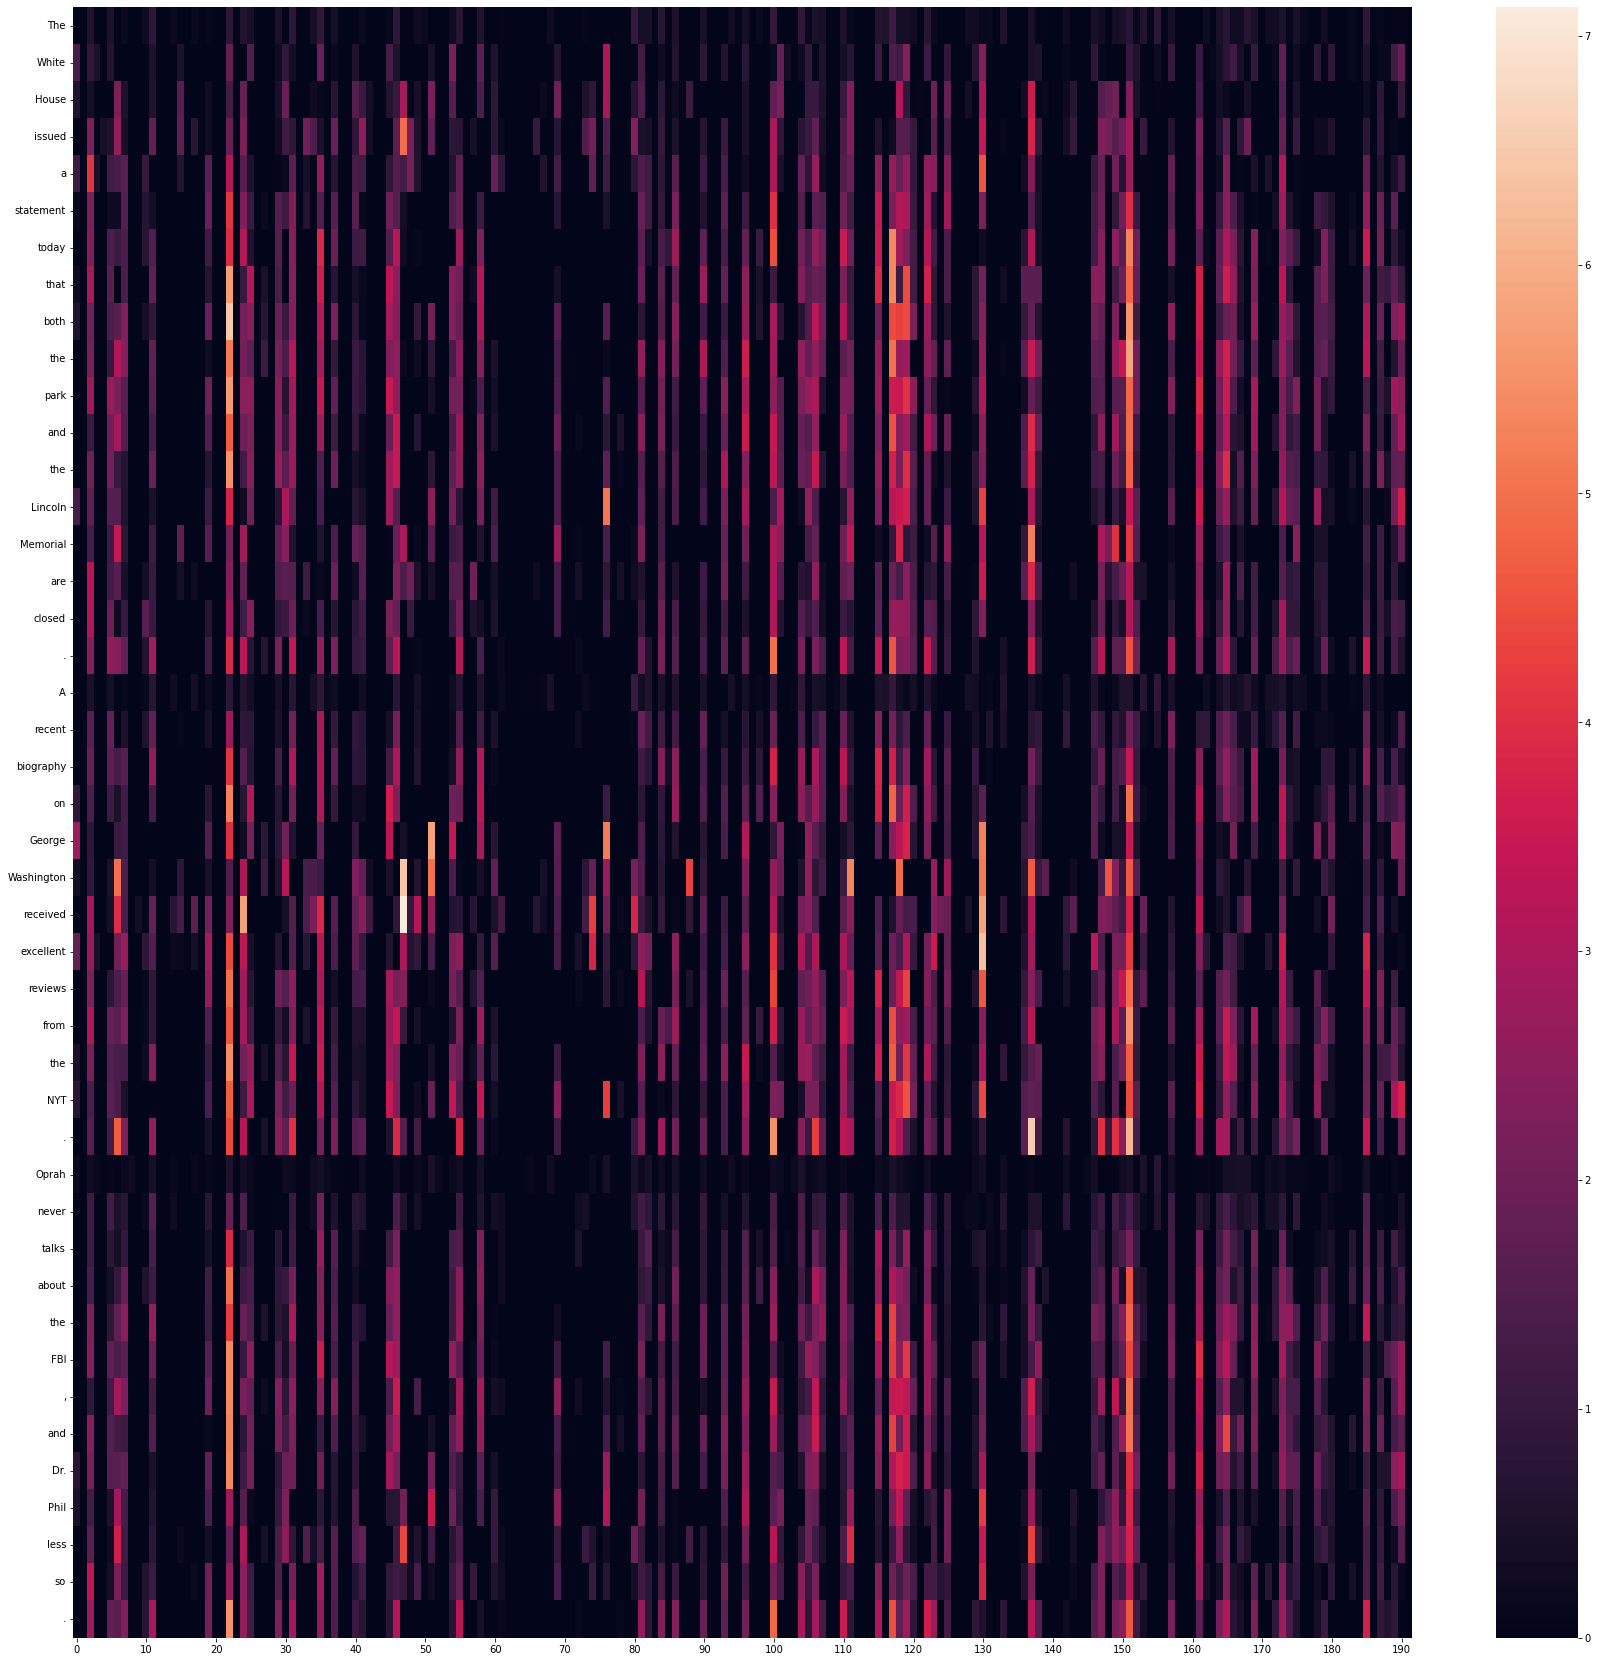

In [ ]:
from zmq.constants import PROTOCOL_ERROR_ZAP_INVALID_METADATA
### TODO : visualize the per-word activation for each sentence ###
### TODO : be sure to label your axes appropriately, and include a title! ###

import seaborn as sns
import pandas as pd

hid_units = np.arange(len(hidden_layer2[0]))
test_sents_tokens = [item for sublist in test_sents for item in sublist]
plotdata=hidden_layer2

df = pd.DataFrame(plotdata, columns= hid_units)

plt.figure(figsize = (30,30))

ax = sns.heatmap(plotdata, xticklabels=10, yticklabels=test_sents_tokens, square=False)


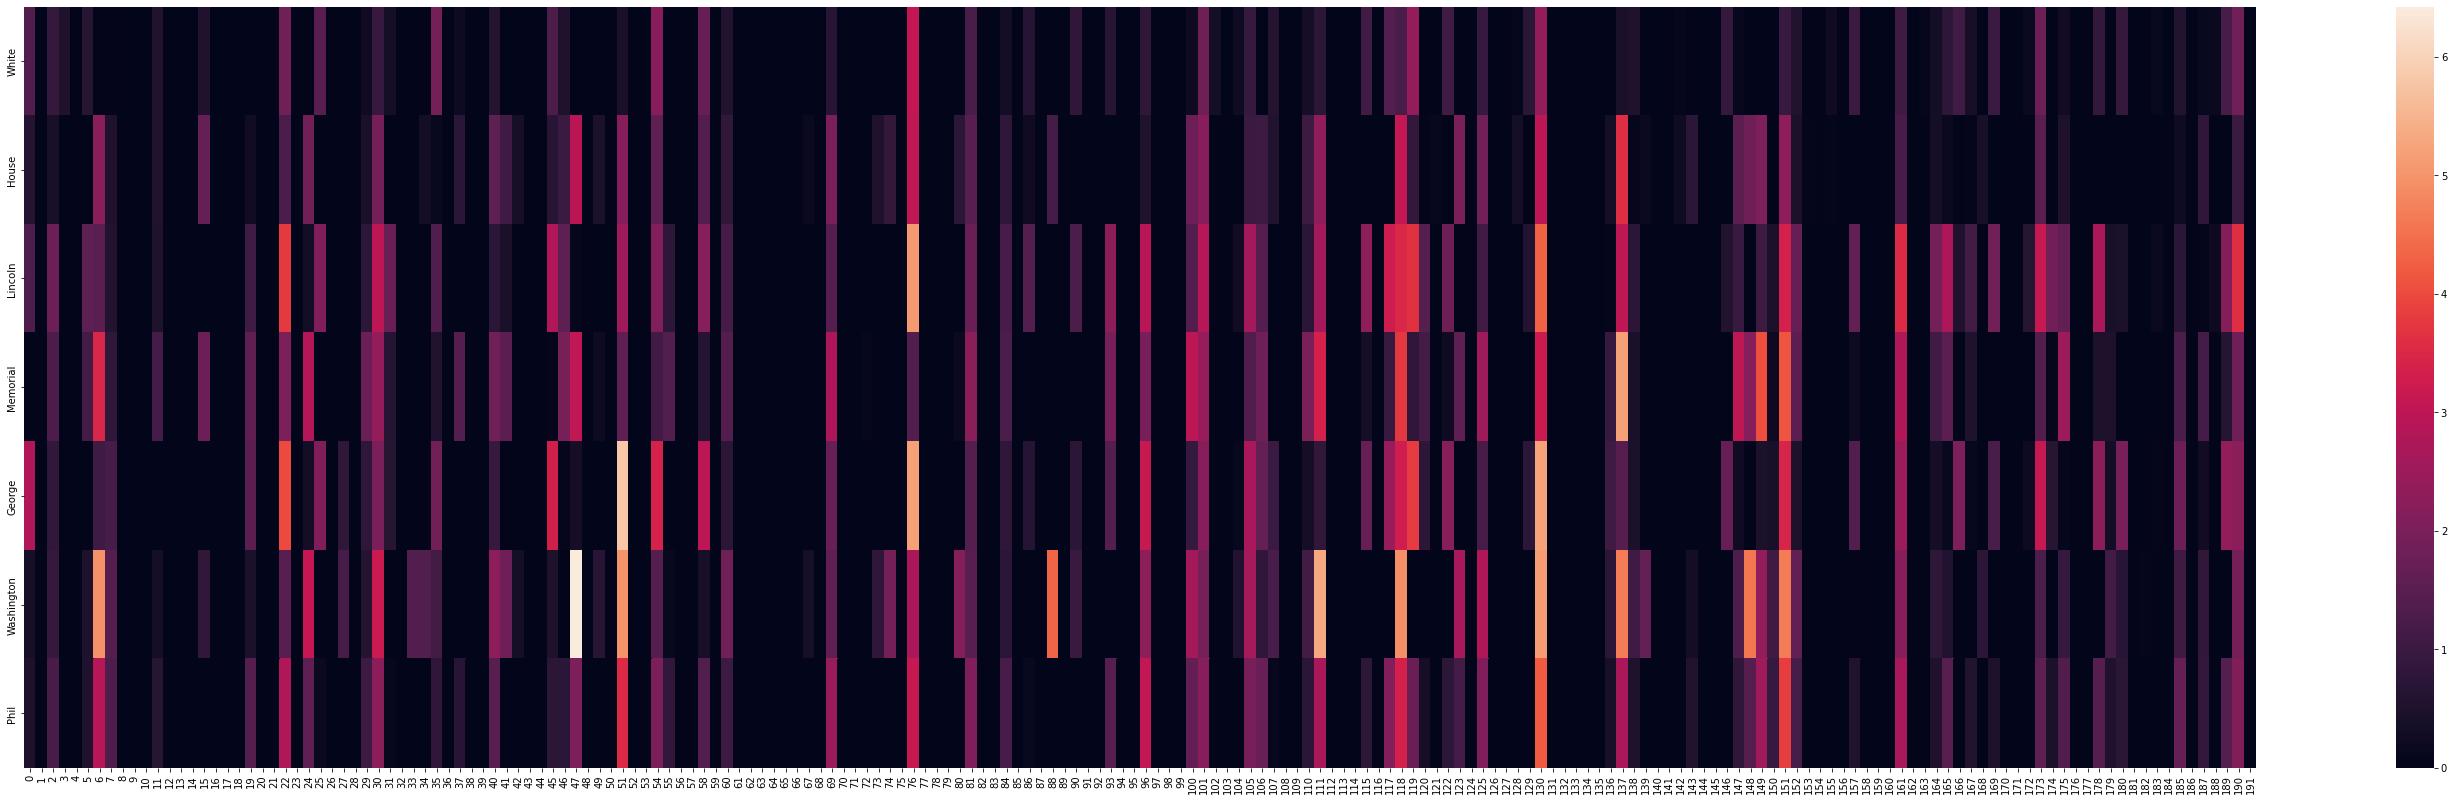

In [ ]:
# ALL words with NER labels

X = np.arange(len(hidden_layer2[0]))
len(X)
Z = [hidden_layer2[i] for i in ind]
len(Z)
#print(len(Z))

plotdata = pd.DataFrame(Z, columns=X)

plt.figure(figsize = (50,14))
ax = sns.heatmap(plotdata, xticklabels=1, yticklabels=word, square=False)
plt.show()

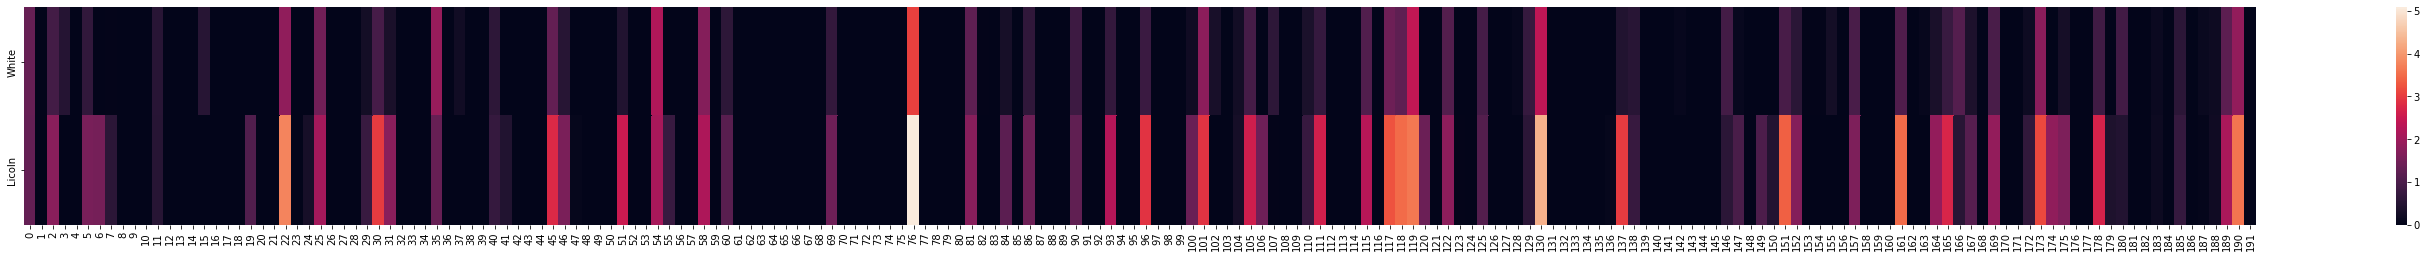

In [ ]:
#B-LOC: 1.White, 13.Lincoln

X = np.arange(len(hidden_layer2[0]))
Y = [test_sents_tokens[1],test_sents_tokens[13]]
Z = [hidden_layer2[1],hidden_layer2[13]]
#print(len(Z))

plotdata = pd.DataFrame(Z, columns=X)

plt.figure(figsize = (50,4))
ax = sns.heatmap(plotdata, xticklabels=1, yticklabels=["White","Licoln"], square=False)
plt.show()

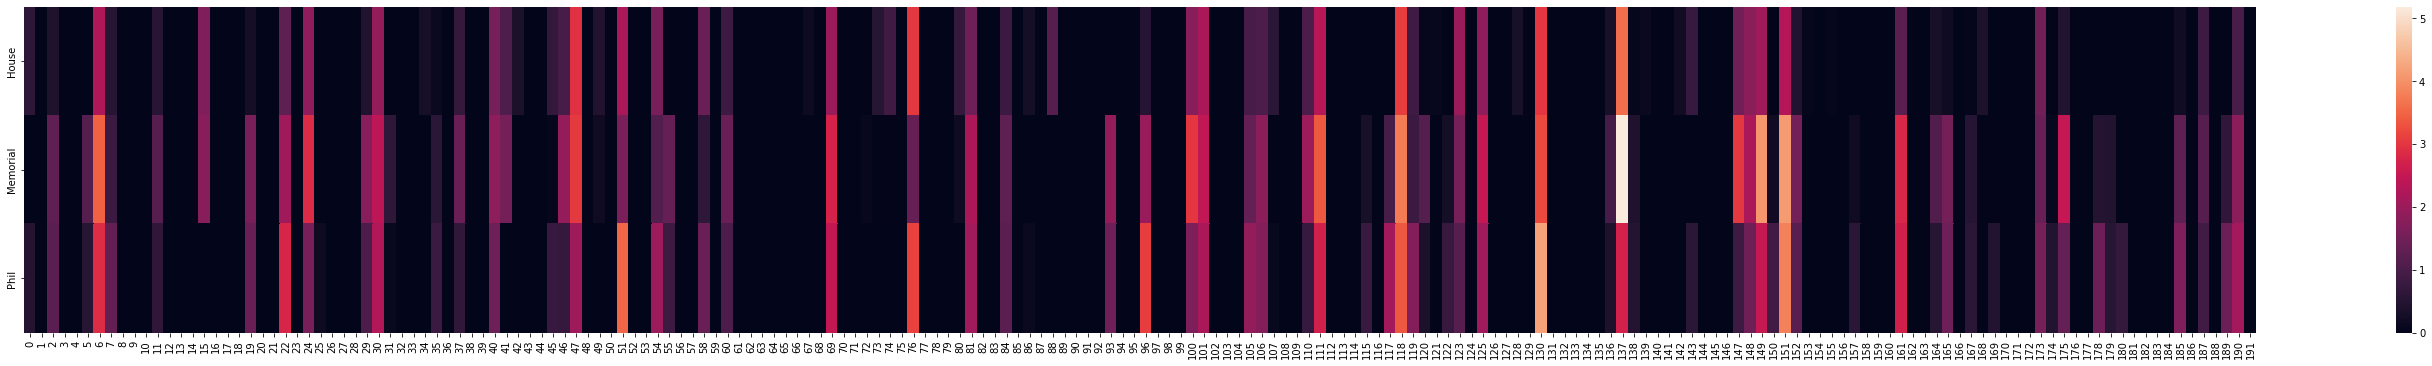

In [ ]:
#I-LOC: 2.House, 14.Memorial, 40. Phil

X = np.arange(len(hidden_layer2[0]))
Y = [test_sents_tokens[2],test_sents_tokens[14],test_sents_tokens[40] ]
Z = [hidden_layer2[2],hidden_layer2[14], hidden_layer2[40]]
#print(len(Z))

plotdata = pd.DataFrame(Z, columns=X)

plt.figure(figsize = (50,6))
ax = sns.heatmap(plotdata, xticklabels=1, yticklabels=["House","Memorial","Phil"], square=False)
plt.show()

<a name="q9"></a>
[[^^^]](#outline) 
### **Q8: Short Report on Your Visualizations**
Discuss your findings. At which words does your layer show high levels of activation? At which words does your layer show low levels of activation? Looking at your visualizations, describe what the model may be using to make predictions.

#### **A8:**
The common words like "that", "both", "a", "the" show higher levels of activations in our visualization. The less common words like "Oprah", "A", "The", "White" show low levels of activation. High frequency words have overall more high activation units than the low frequency words. <br> 
Another important finding is that similar words which predicted to have same NE tags tend to have similar pattern of activation.<br>
For example, "House","Memorial","Phil" are all predicted to be "I-LOC". Their activation patterns look also similar to each other, but are not very similar to the patterns of "White" and "Lincoln". The 137th hidden unit appear to be highly activated in all the three words' patterns and don't highly activated in other words. Thus, maybe we can say that 137th hidden unit can partially control the model to predict a "I-LOC" or not.<br>
However, the 76th hidden unit and 130th hidden unit appear to be highly activated in all NE words". Thus, maybe we can say that 76th hidden unit and 130th hidden unit can partially control the model to predict a word to be a NE word or not. <br>



<a name="part6"></a>
[[^^^]](#outline) 
# **Part 6: Review Questions**
Finally, ou will need to answer the five questions below. We expect answers to be to-the-point; answers that are vague, meandering, or imprecise *will receive fewer points* than a precise but partially correct answer.

<a name="q10"></a>
[[^^^]](#outline) 
### **Q10: Model Comparisons**
Please address the following questions:
- How does your FFNN model perform in relation to your HMM and MEMM models? 
- How about the comparison between the first RNN and the FFNN? 
- For both comparisons, how did you expect the accuracy to change and why? What are the actual results that you observed? 

In [ ]:
def validation_model(val_loader, model):
    model.eval()
    predictions = []
                            
    for (input_batch, expected_out, batch_mask) in tqdm(val_loader, 
                                                        leave=False, desc="Validation Batches"):
        #print(expected_out)
        #flattened_expected_out = expected_out.reshape(-1).to(device)
        #print(len(input_batch))
        flattened_batch_mask = batch_mask.reshape(-1).to(device)
        output = model(input_batch.to(get_device())).to(get_device())
        flattened_output = output.reshape(-1, output.shape[-1])
        _, predicted = torch.max(output, -1)
        flattened_predicted = predicted.reshape(-1)
        predicted = flattened_predicted[flattened_batch_mask].to("cpu")
        predicted_list = predicted.squeeze().tolist()
        #print(predicted_list)
        predictions.extend(predicted_list)
    return predictions

In [ ]:
def format_output_labels(token_labels, token_indices):
    """
    Returns a dictionary that has the labels (LOC, ORG, MISC or PER) as the keys, 
    with the associated value being the list of entities predicted to be of that key label. 
    Each entity is specified by its starting and ending position indicated in [token_indices].

    Eg. if [token_labels] = ["B-ORG", "I-ORG", "O", "O", "B-ORG"]
           [token_indices] = [15, 16, 17, 18, 19]
        then dictionary returned is 
        {'LOC': [], 'MISC': [], 'ORG': [(15, 16), (19, 19)], 'PER': []}

    :parameter token_labels: A list of token labels (eg. B-PER, I-PER, B-LOC, I-LOC, B-ORG, I-ORG, B-MISC, OR I-MISC).
    :type token_labels: List[String]
    :parameter token_indices: A list of token indices (taken from the dataset) 
                              corresponding to the labels in [token_labels].
    :type token_indices: List[int]
    """
    label_dict = {"LOC":[], "MISC":[], "ORG":[], "PER":[]}
    prev_label = 'O'
    start = token_indices[0]
    for idx, label in enumerate(token_labels):
      curr_label = label.split('-')[-1]
      if label.startswith('B-') or curr_label != prev_label:
        if prev_label != 'O':
          label_dict[prev_label].append((start, token_indices[idx-1]))
        if curr_label != 'O':
          start = token_indices[idx]
        else:
          start = None
      
      prev_label = curr_label

    if start is not None and prev_label != 'O':
      label_dict[prev_label].append((start, token_indices[idx]))
    return label_dict

In [ ]:
# Code for mean F1

import numpy as np

def mean_f1(y_pred_dict, y_true_dict):
    """ 
    Calculates the entity-level mean F1 score given the actual/true and 
    predicted span labels.
    :parameter y_pred_dict: A dictionary containing predicted labels as keys and the 
                            list of associated span labels as the corresponding
                            values.
    :type y_pred_dict: Dict<key [String] : value List[Tuple]>
    :parameter y_true_dict: A dictionary containing true labels as keys and the 
                            list of associated span labels as the corresponding
                            values.
    :type y_true_dict: Dict<key [String] : value List[Tuple]>

    Implementation modified from original by author @shonenkov at
    https://www.kaggle.com/shonenkov/competition-metrics.
    """
    F1_lst = []
    valid_dict={}
    for key in y_true_dict:
        TP, FN, FP = 0, 0, 0
        num_correct, num_true = 0, 0
        preds = y_pred_dict[key]
        trues = y_true_dict[key]
        for true in trues:
            num_true += 1
            if true in preds:
                num_correct += 1
            else:
                continue
        num_pred = len(preds)
        if num_true != 0:
            if num_pred != 0 and num_correct != 0:
                R = num_correct / num_true
                P = num_correct / num_pred
                F1 = 2*P*R / (P + R)
            else:
                F1 = 0      # either no predictions or no correct predictions
        else:
            continue
        valid_dict[key] = [num_correct,num_true,num_pred]
        F1_lst.append(F1)
    #print(valid_dict)
    return np.mean(F1_lst),valid_dict
    

In [ ]:
import pandas as pd
def f1output(pred_token_labels, true_token_labels, token_indices):
  y_pred_dict = format_output_labels(pred_token_labels, token_indices)
  y_true_dict = format_output_labels(true_token_labels, token_indices)
  f1,summ = mean_f1(y_pred_dict, y_true_dict)
  result = {"LOC":{"Recall":[],"Precision":[],"F1":[]},
            "MISC":{"Recall":[],"Precision":[],"F1":[]}, 
            "ORG":{"Recall":[],"Precision":[],"F1":[]}, 
            "PER":{"Recall":[],"Precision":[],"F1":[]}}
  for key in summ.keys():
      result[key]['Recall'] = summ[key][0]/summ[key][1]
      result[key]['Precision'] = summ[key][0]/summ[key][2]
      result[key]['F1'] = (2*result[key]['Recall']
                           *result[key]['Precision'])/(result[key]['Recall']
                                                       +result[key]['Precision'])
  print(pd.DataFrame.from_dict(result))
  print("f1 is: ", f1)


In [ ]:
### pass the validation data through the model ###

with torch.no_grad():
  predictions_ffnn = validation_model(val_loader, FFNN_loaded) # remember to change model name!!!
  predictions_rnn = validation_model(val_loader, rnn_loaded)

Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
### TODO : extract labels and indices for model predictions of named entities ###
num_to_category = dict([(value, key) for key, value in category_map.items()])
#num_to_category

predictions_NER_ffnn = [num_to_category[val] for val in predictions_ffnn]
predictions_NER_rnn = [num_to_category[val] for val in predictions_rnn]
#predictions_NER

In [ ]:
#ffnn
pred_token_labels = predictions_NER_ffnn
true_token_labels = [item for sublist in val['NER'] for item in sublist]
token_indices = [item for sublist in val['index'] for item in sublist]
f1output(pred_token_labels, true_token_labels, token_indices)


                LOC      MISC       ORG       PER
Recall     0.404444  0.290909  0.136842  0.109375
Precision  0.486631  0.410256  0.164557  0.176471
F1         0.441748  0.340426  0.149425  0.135048
f1 is:  0.26666165589950086


In [ ]:
#rnn
pred_token_labels = predictions_NER_rnn
true_token_labels = [item for sublist in val['NER'] for item in sublist]
token_indices = [item for sublist in val['index'] for item in sublist]
f1output(pred_token_labels, true_token_labels, token_indices)


                LOC      MISC       ORG       PER
Recall     0.524444  0.436364  0.231579  0.604167
Precision  0.651934  0.480000  0.293333  0.577114
F1         0.581281  0.457143  0.258824  0.590331
f1 is:  0.47189449088400826


<a name="q10"></a>
[[^^^]](#outline) 
### **Q10: Model Comparisons**
Please address the following questions:
- How does your FFNN model perform in relation to your HMM and MEMM models? 
- How about the comparison between the first RNN and the FFNN? 
- For both comparisons, how did you expect the accuracy to change and why? What are the actual results that you observed? 

#### **A10:** 
The performance of each model is shown below:

HMM performance:

Error | LOC	| MISC |	ORG |	PER
------------- | ------------- | ------------- |------------- |------------- |
Recall| 0.524444 |	0.363636 |	0.368421 |	0.562500
Precision | 0.836879|	0.681818|	0.636364|	0.923077
F1 | 0.644809 |	0.474308|	0.466667	|0.699029
HMM f1 is:  0.5058

MEMM performance:

Error | LOC	| MISC |	ORG |	PER
------------- | ------------- | ------------- |------------- |------------- |
Recall| 0.542222	|0.351515	|0.357895	|0.557292
Precision | 0.859155	|0.794521	|0.829268|	0.922414
F1 | 0.664850	|0.487395	|0.500000	|0.694805
MEMM f1 is:  0.5061

FFNN performance:

Error | LOC	| MISC |	ORG |	PER
------------- | ------------- | ------------- |------------- |------------- |
Recall| 0.404444 | 0.290909 | 0.136842|  0.109375
Precision | 0.486631  |0.410256 | 0.164557 | 0.176471
F1 | 0.441748 | 0.340426 | 0.149425 | 0.135048
FFNN f1 is:  0.26666165589950086

RNN performance: 

Error | LOC	| MISC |	ORG |	PER
------------- | ------------- | ------------- |------------- |------------- |
Recall|  0.524444  |0.436364 | 0.231579|  0.604167
Precision | 0.651934 | 0.480000 | 0.293333 | 0.577114
F1 | 0.581281 | 0.457143 | 0.258824 | 0.590331
RNN f1 is:  0.47189449088400826

1. How does your FFNN model perform in relation to your HMM and MEMM models? </br>
FFNN get obvious worse performance than the HMM and MEMM models. The document level F1 of FFNN is only 0.26, while the F1 of HMM is 0.50 and the F1 of MEMM is also 0.50. 
2. How about the comparison between the first RNN and the FFNN? </br> FFNN perform more poorly than RNN in all Recal, Precision, and F1.
3. For both comparisons, how did you expect the accuracy to change and why? What are the actual results that you observed? </br> 
We expect the model ranking in terms of accuracy to be RNN > FFNN > MEMM > HMM. But it terms out to be MEMM > HMM > RNN > FFNN. The relation between RNN and FFNN is expected. But the neural networks perform worse than HMM and MEMM in general. It may be associated with the parameter of the models, such as the number of epoch, number of hidden layers, etc.





<a name="q11"></a>
[[^^^]](#outline) 
### **Q11: RNNs vs. FFNNs**

How do RNNs incorporate sequential information differently than FFNNs?

#### **A11:**
RNNs take information from the hidden layers of prior inputs to influence the current hidden layers and output, while FFNNs assume that each input word in a sentence is independent of each other. 

<a name="q12"></a>
[[^^^]](#outline) 
### **Q12: Long-distance dependencies & RNNs**
RNNs are known to struggle with long-distance dependencies. What is a fundamental reason for why this is the case?

#### **A12:**
Because it has vanishing gradient issue. The gradient signal gets smaller and smaller as it backpropagates further so the gradient signal from far away is much smaller than gradient signal from close-by. Therefore, model weights are updated only with respect to near effects, not long-term effects. 

<a name="q13"></a>
[[^^^]](#outline)
### **Q13: Directionality in RNNs**
In applying RNNs to tasks in NLP, we have discovered that (at least for tasks in English) feeding a sentence into an RNN backwards (i.e. inputting the sequence of vectors corresponding to ($course$, $great$, $a$, $is$, $NLP$) instead of ($NLP$, $is$, $a$, $great$, $course$)) tends to improve performance. Why might this be the case?

#### **A13:**
I guess this is associated with the long-distance dependencies issue mentioned above. Feeding a sentence backwards is helpful because it tends to put the most important information (the subject is more likely to be the topic of a sentence) at the end so that it will not be forgotten.

<a name="q14"></a>
[[^^^]](#outline) 
### **Q14: Shortcomings of RNNs**
In using RNNs and word embeddings for NLP tasks, we are no longer required to engineer specific features that are useful for the task; the model discovers them automatically. Stated differently, it seems that neural models tend to discover better features than human researchers can directly specify. This comes at the cost of systems having to consume tremendous amounts of data to learn these kinds of patterns from the data. Beyond concerns of dataset size (and the computational resources required to process and train using this data as well as the further environmental harm that results from this process), why might we disfavor RNN models?

#### **A14:**
1. Since we are no longer required to engineer specific features, even though we get high accuracy in RNN models than MEMM, it is difficult for researchers to check which specific features contribute to the learning process. We only have multiple abstract hidden nodes.


2. Data can be biased and problematic. The current data on the Internet is not representative of the entire world. It can only represent the majority of people and not the minority who may not have a lot of exposure on the Internet. There are many biases in the data, such as gender, religion, nationality bias and stereotypes.

3. We disfavor RNN also because of the vanishing gradient issue. We could use other models to avoid or eliminate this issue.

<a name="part7"></a>
[[^^^]](#outline) 
# **Part 7: Kaggle Submission**

**BASELINES TO BE ADDED BY FRIDAY, SEPT. 30TH.**

Using the best-performing FFNN and RNN models, generate predictions for the test set, and submit them to Kaggle competition. 

Below, we will use the same output output function from HW1: `create_submission`. This function submits given predicted tokens and associated token indices in the correct format. As such, we will use the `format_output_labels` functions from HW1 as well.

Submissions to Kaggle should be a CSV file consisting of five lines and two columns. The first line is a fixed header, and each of the remaining four lines corresponds to one of the four types of named entities. The first column is the label identifier *Id* (one of PER, LOC, ORG or MISC), and the second column *Predicted* is a list of entities (separated by single space) that you predict to be of that type. Each entity is specified by its starting and ending index (concatenated by a hypen) as given in the test corpus. 

You can use the function **create_submission** that takes the list of predicted labels and the list of associated token indices as inputs and creates the the output CSV file at a specified path.

NOTE: Ensure that there are **no** rows with *Id* = "O" in your Kaggle Submission.

First, process the test data into a form the models can use:

In [ ]:
### TODO : vectorize the test data ###
test_loader

#print("I'm not completed yet!")

Next, pass your vectorized test data through the model and keep track of its predictions. We recommend that you pass the test data under the `with torch.no_grad()` environment to speed up your testing (see documentation on `torch.no_grad()` [here](https://pytorch.org/docs/stable/generated/torch.no_grad.html)). 

In [ ]:
def test_model(test_loader, model):
    model.eval()
    predictions = []
                            
    for (input_batch, expected_out, batch_mask) in tqdm(test_loader, leave=False, desc="Validation Batches"):
        #print(expected_out)
        #flattened_expected_out = expected_out.reshape(-1).to(device)
        #print(len(input_batch))
        flattened_batch_mask = batch_mask.reshape(-1).to(device)
        output = model(input_batch.to(get_device())).to(get_device())
        flattened_output = output.reshape(-1, output.shape[-1])
        _, predicted = torch.max(output, -1)
        flattened_predicted = predicted.reshape(-1)
        predicted = flattened_predicted[flattened_batch_mask].to("cpu")
        predicted_list = predicted.squeeze().tolist()
        #print(predicted_list)
        predictions.extend(predicted_list)
    return predictions


In [ ]:
### TODO : pass the test data through the model ###


with torch.no_grad():
  predictions = test_model(test_loader, rnn2) # remember to change model name!!!
  # print(len(predictions))
  #print(predictions[16:100])
  # print(test_flat[16:100])


  #print("I'm not completed yet!")

Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

[6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]


Finally, extract the labels and indices for where your model predicts a named entity and pass it through the `create_submission` function:

In [ ]:
### TODO : extract labels and indices for model predictions of named entities ###


num_to_category = dict([(value, key) for key, value in category_map.items()])
#num_to_category

predictions_NER = [num_to_category[val] for val in predictions]
#predictions_NER

#print("I'm not completed yet!")

In [ ]:
def format_output_labels(token_labels, token_indices):
    """
    Returns a dictionary that has the labels (LOC, ORG, MISC or PER) as the keys, 
    with the associated value being the list of entities predicted to be of that key label. 
    Each entity is specified by its starting and ending position indicated in [token_indices].

    Eg. if [token_labels] = ["B-ORG", "I-ORG", "O", "O", "B-ORG"]
           [token_indices] = [15, 16, 17, 18, 19]
        then dictionary returned is 
        {'LOC': [], 'MISC': [], 'ORG': [(15, 16), (19, 19)], 'PER': []}

    :parameter token_labels: A list of token labels (eg. B-PER, I-PER, B-LOC, I-LOC, B-ORG, I-ORG, B-MISC, OR I-MISC).
    :type token_labels: List[String]
    :parameter token_indices: A list of token indices (taken from the dataset) 
                              corresponding to the labels in [token_labels].
    :type token_indices: List[int]
    """
    label_dict = {"LOC":[], "MISC":[], "ORG":[], "PER":[]}
    prev_label = 'O'
    start = token_indices[0]
    for idx, label in enumerate(token_labels):
      curr_label = label.split('-')[-1]
      if label.startswith('B-') or curr_label != prev_label:
        if prev_label != 'O':
          label_dict[prev_label].append((start, token_indices[idx-1]))
        if curr_label != 'O':
          start = token_indices[idx]
        else:
          start = None
      
      prev_label = curr_label

    if start is not None and prev_label != 'O':
      label_dict[prev_label].append((start, token_indices[idx]))
    return label_dict
    

In [ ]:
import csv

def create_submission(output_filepath, token_labels, token_inds):
    """
    :parameter output_filepath: The full path (including file name) of the output file, 
                                with extension .csv
    :type output_filepath: [String]
    :parameter token_labels: A list of token labels (eg. PER, LOC, ORG or MISC).
    :type token_labels: List[String]
    :parameter token_indices: A list of token indices (taken from the dataset) 
                              corresponding to the labels in [token_labels].
    :type token_indices: List[int]
    """
    label_dict = format_output_labels(token_labels, token_inds)
    with open(output_filepath, mode='w') as csv_file:
        fieldnames = ['Id', 'Predicted']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
        writer.writeheader()
        for key in label_dict:
            p_string = " ".join([str(start)+"-"+str(end) for start,end in label_dict[key]])
            writer.writerow({'Id': key, 'Predicted': p_string})

In [ ]:
# all-in-one cell
# Make predictions for test data + convert int labels to NER + save predictions

with open(os.path.join(path,'test.json'), 'r') as f:
     test_original = json.loads(f.read())

test_text_flat = [item for sublist in test_original['text'] for item in sublist]
test_index_flat = [item for sublist in test_original['index'] for item in sublist]

#make predictions: remember to change the model name!!
with torch.no_grad():
  predictions = test_model(test_loader, rnn_loaded)

num_to_category = dict([(value, key) for key, value in category_map.items()])
predictions_NER = [num_to_category[val] for val in predictions]


save_path_prediction = os.path.join(os.getcwd(), "drive", "MyDrive")
save_path_prediction  = save_path_prediction  + '/model_rnn_loaded_predictions_1023.csv' #Change name!!!

create_submission(save_path_prediction, predictions_NER, test_index_flat)


Validation Batches:   0%|          | 0/7 [00:00<?, ?it/s]

## **Baselines**

On Kaggle, we will provide two baselines for you to evaluate your models agaist: **`FFNN TA Baseline`** and **`RNN TA Baseline`**. You may use them to internally check your models. **BASELINES NOT YET PROVIDED; WE WILL MAKE AN ANNOUNCEMENT WHEN THEY ARE POSTED ON KAGGLE.**

---
<a name="q15"></a>
## **Q15: Competition Score**
[[^^^]](#outline) 


Include your team's **best score** (for a valid FFNN implementation and a valid RNN implementation) and the **name under which that best score was submitted** from Kaggle. See CMS for full instructions.

#### **A15:**
RNN: 0.44216

FFNN: 0.29264

Name: B-PER


In [ ]:
# # !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py

# # from colab_pdf import colab_pdf

# save_path = os.path.join(os.getcwd(), "drive", "MyDrive")
# save_path = save_path  + '/Lisa-Ourwork_CS_4740_FA22_HW2.ipynb'

# # colab_pdf(save_path)

# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf("/content/drive/MyDrive/Colab Notebooks/Lisa-Ourwork_CS_4740_FA22_HW2.ipynb")


In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [ ]:
!cp "./drive/My Drive/Colab Notebooks/FinalOurwork_CS_4740_FA22_HW2.ipynb" ./
!jupyter nbconvert --to html "FinalOurwork_CS_4740_FA22_HW2.ipynb"

[NbConvertApp] Converting notebook FinalOurwork_CS_4740_FA22_HW2.ipynb to html
[NbConvertApp] Writing 1136539 bytes to FinalOurwork_CS_4740_FA22_HW2.html
